In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import seaborn as sns
from sklearn.decomposition import PCA


In [2]:
data = pd.read_csv(r"C:\Users\Akhil R\DeepLearning\AirQualityUCI.csv",sep=';')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [3]:
data.drop(['Unnamed: 15','Unnamed: 16'],axis=1,inplace=True)

In [4]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [6]:
data.iloc[:,2] = data.iloc[:,2].replace(',','.',regex=True)
data.iloc[:,5] = data.iloc[:,5].replace(',','.',regex=True)
data.iloc[:,12] = data.iloc[:,12].replace(',','.',regex=True)
data.iloc[:,13] = data.iloc[:,13].replace(',','.',regex=True)
data.iloc[:,14] = data.iloc[:,14].replace(',','.',regex=True)
data = data.astype({'CO(GT)':'float64',
             'C6H6(GT)':'float64',
             'T':'float64',
             'RH':'float64',
             'AH':'float64'})

In [7]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [9]:
data.drop(['Date','Time'],axis=1,inplace=True)

In [10]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [11]:
data.replace(to_replace= -200, value= np.NaN, inplace= True)

In [12]:
data.isnull().sum()

CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
dtype: int64

In [13]:
rows_with_null = data[data.isnull().any(axis=1)]
rows_with_null

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9,0.6,1010.0,19.0,1.7,561.0,NaN,1705.0,NaN,1235.0,501.0,10.3,60.2,0.7517
10,NaN,1011.0,14.0,1.3,527.0,21.0,1818.0,34.0,1197.0,445.0,10.1,60.5,0.7465
33,0.8,889.0,21.0,1.9,574.0,NaN,1680.0,NaN,1187.0,512.0,7.0,62.3,0.6261
34,NaN,831.0,10.0,1.1,506.0,21.0,1893.0,32.0,1134.0,384.0,6.1,65.9,0.6248
39,NaN,1545.0,NaN,22.1,1353.0,NaN,767.0,NaN,2058.0,1588.0,9.2,56.2,0.6561
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data.dropna(inplace=True)

In [15]:
rows_with_null = data[data.isnull().any(axis=1)]
rows_with_null

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH


In [16]:
data.duplicated().sum()

0

In [17]:
data.drop_duplicates(inplace=True,ignore_index=True)

In [18]:
data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,4.4,1449.0,501.0,19.5,1282.0,254.0,625.0,133.0,2100.0,1569.0,19.1,61.1,1.3345
823,3.1,1363.0,234.0,15.1,1152.0,189.0,684.0,110.0,1951.0,1495.0,18.2,65.4,1.3529
824,3.0,1371.0,212.0,14.6,1136.0,174.0,689.0,102.0,1927.0,1471.0,18.1,66.1,1.3579
825,3.1,1406.0,275.0,13.7,1107.0,167.0,718.0,108.0,1872.0,1384.0,17.7,66.9,1.3422


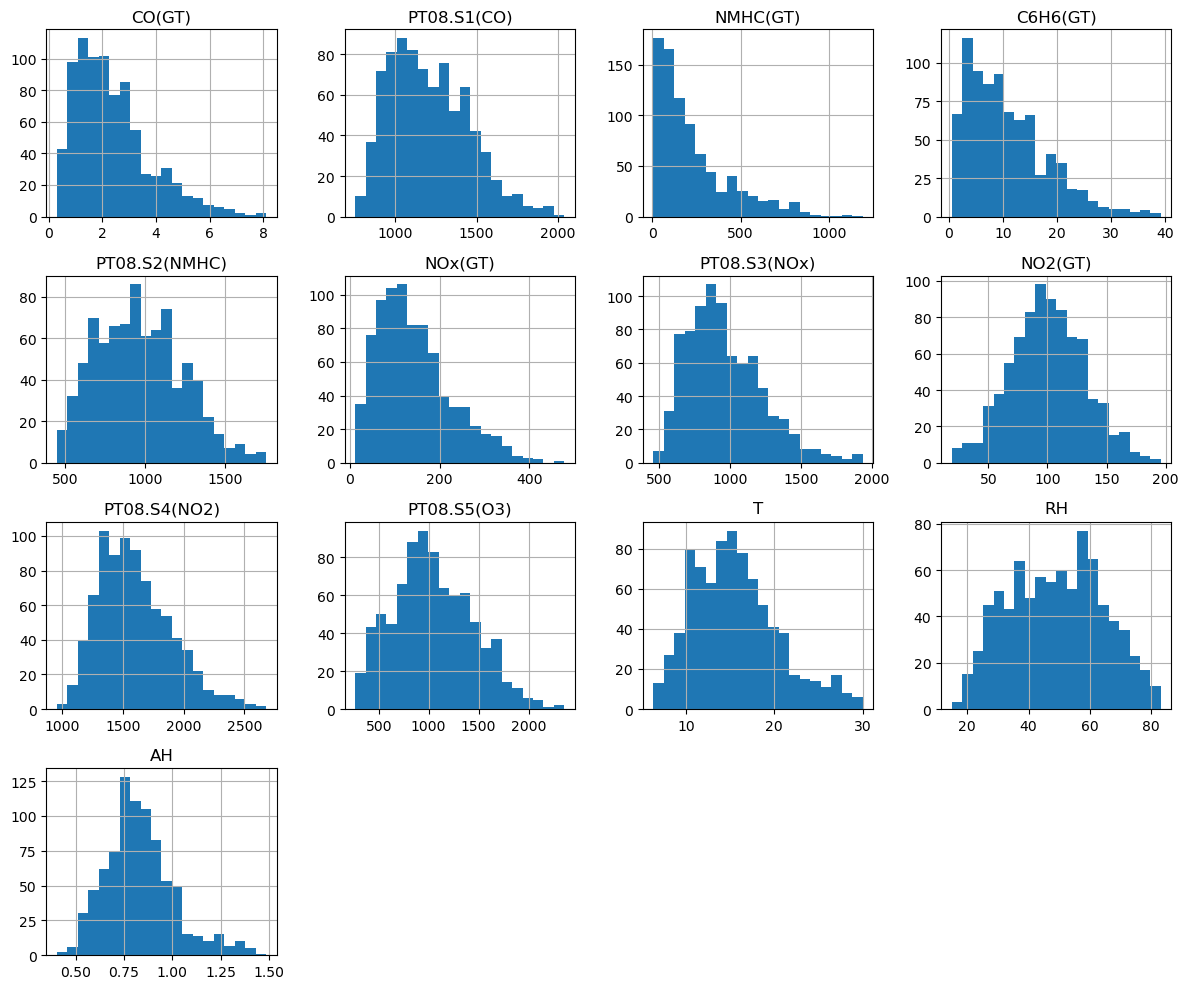

In [19]:
data.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

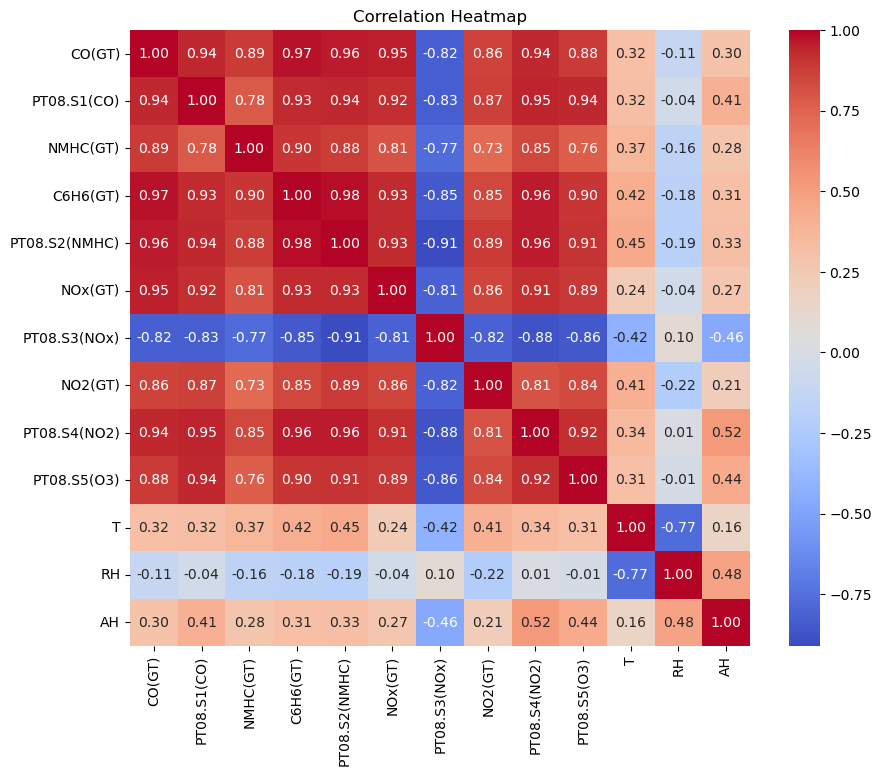

In [20]:
# Compute the correlation matrix
corr = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
features = data.drop('AH', axis=1)
target = data['AH']

In [22]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [23]:
X_train, X_temp, y_train, y_temp = train_test_split(features_scaled, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [24]:
model_ann = Sequential([
        Dense(128, activation='relu', input_dim=X_train.shape[1]),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')
    ])
model_ann.compile(optimizer='adam', loss='mse', metrics=['mae'])


C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_ann = model_ann.fit(X_train, y_train, validation_data=(X_val, y_val),
                      epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.4104 - mae: 0.5529 - val_loss: 0.0484 - val_mae: 0.1803
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0522 - mae: 0.1673 - val_loss: 0.0295 - val_mae: 0.1320
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0248 - mae: 0.1203 - val_loss: 0.0143 - val_mae: 0.0876
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0204 - mae: 0.1074 - val_loss: 0.0091 - val_mae: 0.0696
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0132 - mae: 0.0913 - val_loss: 0.0062 - val_mae: 0.0599
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0160 - mae: 0.0979 - val_loss: 0.0055 - val_mae: 0.0524
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0105 - mae: 0.0777 - val_loss: 0.0048 - val_mae: 0.0489
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0099 - mae: 0.0762 - val_loss: 0.0051 - val_mae: 0.0527
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087 - mae

In [26]:
ann_metrics = model_ann.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - mae: 0.0263   


In [27]:
def plot_loss_curves(history, title="Loss Curve"):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

def plot_predictions(model, X, y, title="Predicted vs True Values"):
    predictions = model.predict(X)
    plt.figure(figsize=(10, 6))
    plt.scatter(y, predictions, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Ideal line
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.grid()
    plt.show()

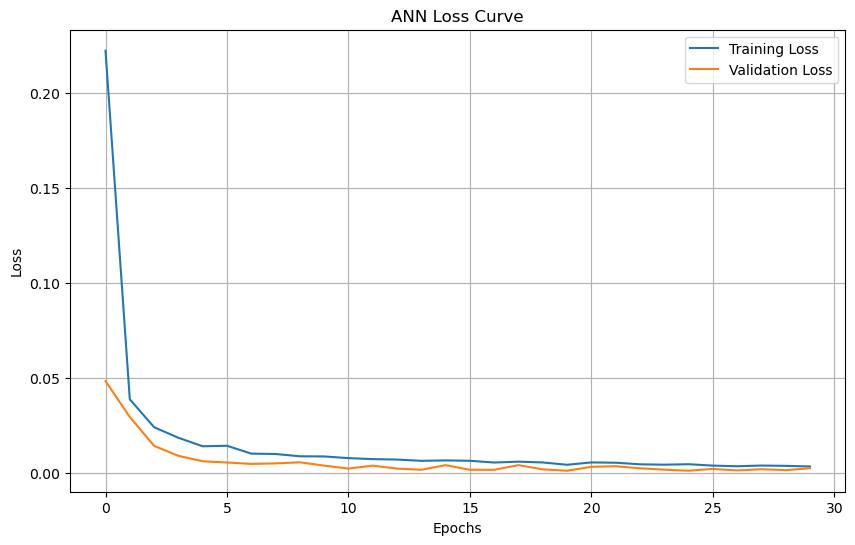

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


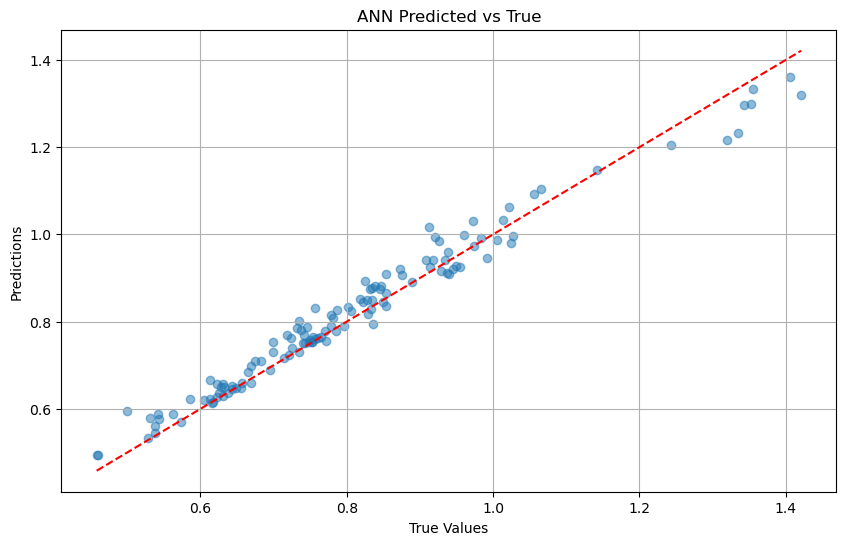

In [28]:
plot_loss_curves(history_ann, title="ANN Loss Curve")
plot_predictions(model_ann, X_test, y_test, title="ANN Predicted vs True")

In [29]:
print("ANN Metrics:", dict(zip(model_ann.metrics_names, ann_metrics)))

ANN Metrics: {'loss': 0.0013251790078356862, 'compile_metrics': 0.027660580351948738}


In [30]:
model_rnn = Sequential([
    SimpleRNN(128, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
    Dropout(0.2),
    SimpleRNN(64, activation='relu', return_sequences=False),
    Dense(1, activation='linear')
])
model_rnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
X_train_rnn = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val_rnn = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test_rnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [32]:
early_stopping_rnn = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [34]:
history_rnn = model_rnn.fit(X_train_rnn, y_train, validation_data=(X_val_rnn, y_val),
                            epochs=50, batch_size=32, callbacks=[early_stopping_rnn])

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0291 - mae: 0.1363 - val_loss: 0.0124 - val_mae: 0.0881
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0215 - mae: 0.1140 - val_loss: 0.0082 - val_mae: 0.0639
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mae: 0.0798 - val_loss: 0.0051 - val_mae: 0.0476
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0084 - mae: 0.0717 - val_loss: 0.0023 - val_mae: 0.0301
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mae: 0.0623 - val_loss: 0.0020 - val_mae: 0.0281
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mae: 0.0567 - val_loss: 0.0018 - val_mae: 0.0262
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mae: 0.0502 - val_loss: 0.0094 - val_mae: 0.0840
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mae: 0.0600 - val_loss: 0.0075 - val_mae: 0.0742
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mae:

In [ ]:
rnn_metrics = model_rnn.evaluate(X_test_rnn, y_test)

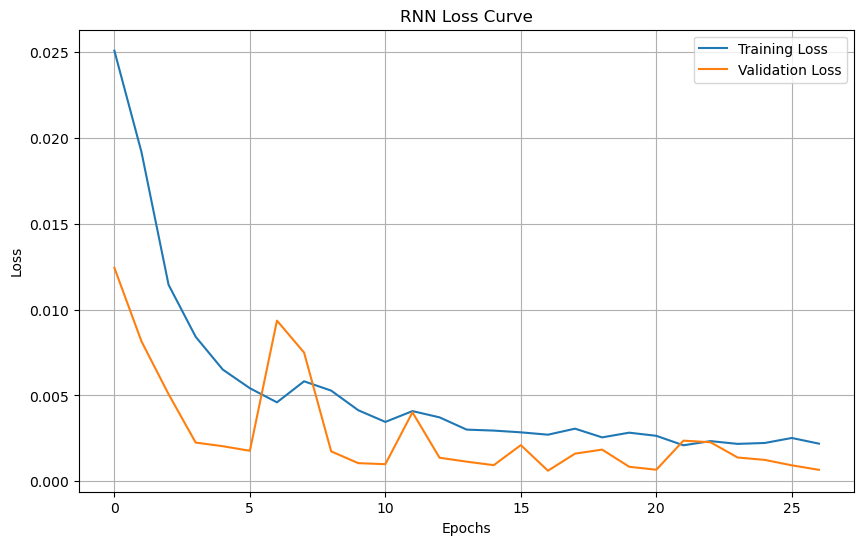

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


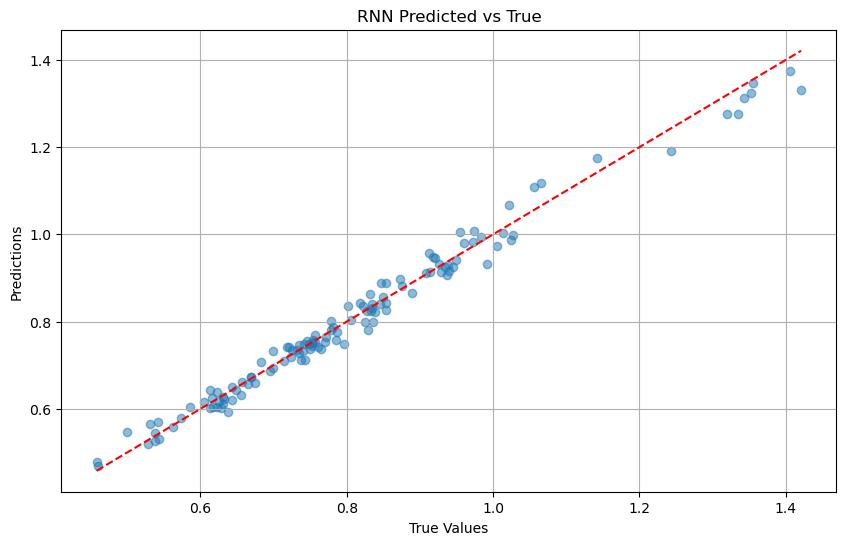

In [36]:
plot_loss_curves(history_rnn, title="RNN Loss Curve")
plot_predictions(model_rnn, X_test_rnn, y_test, title="RNN Predicted vs True")

In [37]:
from tensorflow.keras.optimizers import Adam

# Experiment with different hyperparameters
learning_rates = [1e-5, 1e-4, 1e-3]
units = [64, 128, 256]
dropout_rates = [0.2, 0.3, 0.4]
epochs = 50

best_model_ann = None
best_val_loss = float('inf')

# Loop over combinations of hyperparameters
for lr in learning_rates:
    for unit in units:
        for dropout in dropout_rates:
            # Define the model
            model_ann = Sequential([
                Dense(unit, activation='relu', input_dim=X_train.shape[1]),
                Dropout(dropout),
                Dense(unit, activation='relu'),
                Dense(1, activation='linear')
            ])
            model_ann.compile(optimizer=Adam(learning_rate=lr), loss='mse', metrics=['mae'])

            # Train the model
            early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
            history_ann = model_ann.fit(X_train, y_train, validation_data=(X_val, y_val),
                                        epochs=epochs, batch_size=32, callbacks=[early_stopping])

            # Evaluate the model
            val_loss = history_ann.history['val_loss'][-1]
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_model_ann = model_ann

print(f"Best ANN model with learning rate: {lr}, units: {unit}, dropout rate: {dropout}")

Epoch 1/50


C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.5697 - mae: 0.7323 - val_loss: 0.5605 - val_mae: 0.7290
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5641 - mae: 0.7271 - val_loss: 0.5454 - val_mae: 0.7186
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5393 - mae: 0.7073 - val_loss: 0.5306 - val_mae: 0.7084
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5298 - mae: 0.7051 - val_loss: 0.5164 - val_mae: 0.6985
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5218 - mae: 0.6967 - val_loss: 0.5023 - val_mae: 0.6884
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5008 - mae: 0.6815 - val_loss: 0.4883 - val_mae: 0.6782
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4793 - mae: 0.6667 - val_loss: 0.4747 - val_mae: 0.6682
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4624 - mae: 0.6576 - val_loss: 0.4615 - val_mae: 0.6584
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4593 - mae: 0.6482 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7463 - mae: 0.8377 - val_loss: 0.7182 - val_mae: 0.8288
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7246 - mae: 0.8260 - val_loss: 0.7038 - val_mae: 0.8201
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7322 - mae: 0.8308 - val_loss: 0.6898 - val_mae: 0.8116
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7538 - mae: 0.8408 - val_loss: 0.6758 - val_mae: 0.8030
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6773 - mae: 0.7948 - val_loss: 0.6623 - val_mae: 0.7946
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6680 - mae: 0.7931 - val_loss: 0.6488 - val_mae: 0.7862
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6715 - mae: 0.7925 - val_loss: 0.6354 - val_mae: 0.7777
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6470 - mae: 0.7761 - val_loss: 0.6227 - val_mae: 0.7695
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6364 - mae: 0.7705 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.8962 - mae: 0.9188 - val_loss: 0.8872 - val_mae: 0.9211
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8594 - mae: 0.8986 - val_loss: 0.8706 - val_mae: 0.9123
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8615 - mae: 0.9005 - val_loss: 0.8541 - val_mae: 0.9035
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8248 - mae: 0.8795 - val_loss: 0.8379 - val_mae: 0.8949
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7985 - mae: 0.8654 - val_loss: 0.8220 - val_mae: 0.8862
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8155 - mae: 0.8774 - val_loss: 0.8063 - val_mae: 0.8776
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7951 - mae: 0.8660 - val_loss: 0.7907 - val_mae: 0.8689
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7378 - mae: 0.8350 - val_loss: 0.7758 - val_mae: 0.8606
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7371 - mae: 0.8311 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.5189 - mae: 0.7016 - val_loss: 0.4980 - val_mae: 0.6899
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4882 - mae: 0.6814 - val_loss: 0.4732 - val_mae: 0.6720
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4619 - mae: 0.6617 - val_loss: 0.4493 - val_mae: 0.6543
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4457 - mae: 0.6492 - val_loss: 0.4265 - val_mae: 0.6369
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4317 - mae: 0.6387 - val_loss: 0.4047 - val_mae: 0.6198
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4106 - mae: 0.6196 - val_loss: 0.3840 - val_mae: 0.6031
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3817 - mae: 0.5984 - val_loss: 0.3643 - val_mae: 0.5868
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3677 - mae: 0.5839 - val_loss: 0.3453 - val_mae: 0.5705
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3432 - mae: 0.5646 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.9799 - mae: 0.9683 - val_loss: 0.9188 - val_mae: 0.9420
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9127 - mae: 0.9372 - val_loss: 0.8871 - val_mae: 0.9255
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9043 - mae: 0.9307 - val_loss: 0.8562 - val_mae: 0.9090
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8612 - mae: 0.9069 - val_loss: 0.8267 - val_mae: 0.8930
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8295 - mae: 0.8933 - val_loss: 0.7977 - val_mae: 0.8770
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8178 - mae: 0.8828 - val_loss: 0.7691 - val_mae: 0.8609
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7841 - mae: 0.8641 - val_loss: 0.7418 - val_mae: 0.8451
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7377 - mae: 0.8400 - val_loss: 0.7160 - val_mae: 0.8300
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7164 - mae: 0.8274 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.7932 - mae: 0.8640 - val_loss: 0.7628 - val_mae: 0.8515
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7656 - mae: 0.8436 - val_loss: 0.7341 - val_mae: 0.8349
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7420 - mae: 0.8345 - val_loss: 0.7060 - val_mae: 0.8182
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7273 - mae: 0.8244 - val_loss: 0.6783 - val_mae: 0.8015
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6875 - mae: 0.7970 - val_loss: 0.6512 - val_mae: 0.7847
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6630 - mae: 0.7825 - val_loss: 0.6253 - val_mae: 0.7684
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6302 - mae: 0.7612 - val_loss: 0.6004 - val_mae: 0.7522
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5662 - mae: 0.7266 - val_loss: 0.5760 - val_mae: 0.7361
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5779 - mae: 0.7257 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7847 - mae: 0.8668 - val_loss: 0.7448 - val_mae: 0.8457
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7401 - mae: 0.8410 - val_loss: 0.6990 - val_mae: 0.8188
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6804 - mae: 0.8047 - val_loss: 0.6557 - val_mae: 0.7925
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6364 - mae: 0.7800 - val_loss: 0.6139 - val_mae: 0.7663
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6218 - mae: 0.7696 - val_loss: 0.5740 - val_mae: 0.7404
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5812 - mae: 0.7422 - val_loss: 0.5356 - val_mae: 0.7145
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5182 - mae: 0.7016 - val_loss: 0.4987 - val_mae: 0.6887
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4923 - mae: 0.6832 - val_loss: 0.4636 - val_mae: 0.6631
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4499 - mae: 0.6510 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.5850 - mae: 0.7446 - val_loss: 0.5343 - val_mae: 0.7146
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5079 - mae: 0.6927 - val_loss: 0.4897 - val_mae: 0.6827
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4680 - mae: 0.6633 - val_loss: 0.4483 - val_mae: 0.6516
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4251 - mae: 0.6310 - val_loss: 0.4097 - val_mae: 0.6210
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3979 - mae: 0.6064 - val_loss: 0.3739 - val_mae: 0.5910
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3545 - mae: 0.5707 - val_loss: 0.3410 - val_mae: 0.5619
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3282 - mae: 0.5439 - val_loss: 0.3103 - val_mae: 0.5332
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2871 - mae: 0.5089 - val_loss: 0.2822 - val_mae: 0.5052
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2732 - mae: 0.4905 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 1.0677 - mae: 1.0093 - val_loss: 0.9542 - val_mae: 0.9575
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9949 - mae: 0.9748 - val_loss: 0.9026 - val_mae: 0.9310
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9388 - mae: 0.9474 - val_loss: 0.8535 - val_mae: 0.9051
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9152 - mae: 0.9336 - val_loss: 0.8062 - val_mae: 0.8793
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8456 - mae: 0.8965 - val_loss: 0.7611 - val_mae: 0.8541
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8094 - mae: 0.8754 - val_loss: 0.7189 - val_mae: 0.8297
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7582 - mae: 0.8472 - val_loss: 0.6786 - val_mae: 0.8057
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7044 - mae: 0.8167 - val_loss: 0.6400 - val_mae: 0.7820
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6792 - mae: 0.8008 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.6091 - mae: 0.7613 - val_loss: 0.5205 - val_mae: 0.7040
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5028 - mae: 0.6861 - val_loss: 0.4111 - val_mae: 0.6229
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3970 - mae: 0.6055 - val_loss: 0.3155 - val_mae: 0.5423
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2871 - mae: 0.5081 - val_loss: 0.2333 - val_mae: 0.4617
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2305 - mae: 0.4443 - val_loss: 0.1639 - val_mae: 0.3807
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1535 - mae: 0.3533 - val_loss: 0.1109 - val_mae: 0.3041
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1025 - mae: 0.2757 - val_loss: 0.0724 - val_mae: 0.2339
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0702 - mae: 0.2180 - val_loss: 0.0474 - val_mae: 0.1762
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0566 - mae: 0.1902 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7668 - mae: 0.8562 - val_loss: 0.6785 - val_mae: 0.8066
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6674 - mae: 0.7940 - val_loss: 0.5739 - val_mae: 0.7390
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5495 - mae: 0.7154 - val_loss: 0.4775 - val_mae: 0.6707
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4544 - mae: 0.6468 - val_loss: 0.3907 - val_mae: 0.6022
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3530 - mae: 0.5638 - val_loss: 0.3122 - val_mae: 0.5322
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2948 - mae: 0.5054 - val_loss: 0.2451 - val_mae: 0.4634
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2575 - mae: 0.4613 - val_loss: 0.1883 - val_mae: 0.3960
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2001 - mae: 0.3964 - val_loss: 0.1427 - val_mae: 0.3335
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1427 - mae: 0.3329 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.6762 - mae: 0.7906 - val_loss: 0.5601 - val_mae: 0.7288
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5491 - mae: 0.7092 - val_loss: 0.4378 - val_mae: 0.6416
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4261 - mae: 0.6128 - val_loss: 0.3353 - val_mae: 0.5581
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3307 - mae: 0.5341 - val_loss: 0.2501 - val_mae: 0.4774
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2670 - mae: 0.4678 - val_loss: 0.1817 - val_mae: 0.4008
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2038 - mae: 0.3896 - val_loss: 0.1293 - val_mae: 0.3300
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1427 - mae: 0.3148 - val_loss: 0.0910 - val_mae: 0.2671
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1240 - mae: 0.2869 - val_loss: 0.0638 - val_mae: 0.2118
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0993 - mae: 0.2536 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.6906 - mae: 0.8089 - val_loss: 0.5252 - val_mae: 0.7026
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4887 - mae: 0.6781 - val_loss: 0.3541 - val_mae: 0.5715
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3246 - mae: 0.5447 - val_loss: 0.2172 - val_mae: 0.4380
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1914 - mae: 0.4034 - val_loss: 0.1157 - val_mae: 0.3024
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0968 - mae: 0.2704 - val_loss: 0.0576 - val_mae: 0.1968
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0509 - mae: 0.1827 - val_loss: 0.0349 - val_mae: 0.1444
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0354 - mae: 0.1446 - val_loss: 0.0284 - val_mae: 0.1281
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0323 - mae: 0.1380 - val_loss: 0.0256 - val_mae: 0.1206
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0320 - mae: 0.1375 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.5341 - mae: 0.7092 - val_loss: 0.3335 - val_mae: 0.5551
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2890 - mae: 0.5019 - val_loss: 0.1721 - val_mae: 0.3767
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1554 - mae: 0.3458 - val_loss: 0.0901 - val_mae: 0.2527
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0896 - mae: 0.2530 - val_loss: 0.0601 - val_mae: 0.2017
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0728 - mae: 0.2197 - val_loss: 0.0486 - val_mae: 0.1794
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0591 - mae: 0.1941 - val_loss: 0.0414 - val_mae: 0.1649
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0494 - mae: 0.1779 - val_loss: 0.0350 - val_mae: 0.1507
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0501 - mae: 0.1801 - val_loss: 0.0294 - val_mae: 0.1370
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0441 - mae: 0.1670 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.3935 - mae: 0.5966 - val_loss: 0.2985 - val_mae: 0.5200
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2193 - mae: 0.4271 - val_loss: 0.1594 - val_mae: 0.3600
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1262 - mae: 0.2994 - val_loss: 0.0882 - val_mae: 0.2493
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0714 - mae: 0.2211 - val_loss: 0.0581 - val_mae: 0.1938
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0663 - mae: 0.2047 - val_loss: 0.0480 - val_mae: 0.1739
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0610 - mae: 0.1932 - val_loss: 0.0436 - val_mae: 0.1646
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0525 - mae: 0.1787 - val_loss: 0.0400 - val_mae: 0.1562
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0644 - mae: 0.1918 - val_loss: 0.0386 - val_mae: 0.1525
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0455 - mae: 0.1651 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.4049 - mae: 0.6060 - val_loss: 0.1684 - val_mae: 0.3753
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1162 - mae: 0.2997 - val_loss: 0.0525 - val_mae: 0.1859
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0533 - mae: 0.1824 - val_loss: 0.0358 - val_mae: 0.1507
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0418 - mae: 0.1588 - val_loss: 0.0289 - val_mae: 0.1316
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0321 - mae: 0.1400 - val_loss: 0.0233 - val_mae: 0.1157
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0291 - mae: 0.1326 - val_loss: 0.0186 - val_mae: 0.1022
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0228 - mae: 0.1160 - val_loss: 0.0165 - val_mae: 0.0955
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0207 - mae: 0.1100 - val_loss: 0.0143 - val_mae: 0.0891
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0206 - mae: 0.1116 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.6130 - mae: 0.7619 - val_loss: 0.3248 - val_mae: 0.5506
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2612 - mae: 0.4783 - val_loss: 0.1147 - val_mae: 0.3013
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0856 - mae: 0.2507 - val_loss: 0.0421 - val_mae: 0.1615
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0413 - mae: 0.1610 - val_loss: 0.0306 - val_mae: 0.1382
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0412 - mae: 0.1561 - val_loss: 0.0259 - val_mae: 0.1248
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0350 - mae: 0.1434 - val_loss: 0.0223 - val_mae: 0.1151
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0293 - mae: 0.1301 - val_loss: 0.0196 - val_mae: 0.1075
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0297 - mae: 0.1320 - val_loss: 0.0185 - val_mae: 0.1024
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0248 - mae: 0.1204 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.5243 - mae: 0.6999 - val_loss: 0.2825 - val_mae: 0.5095
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1878 - mae: 0.3981 - val_loss: 0.0888 - val_mae: 0.2567
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0697 - mae: 0.2154 - val_loss: 0.0422 - val_mae: 0.1629
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0519 - mae: 0.1791 - val_loss: 0.0339 - val_mae: 0.1431
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0396 - mae: 0.1537 - val_loss: 0.0293 - val_mae: 0.1305
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0362 - mae: 0.1430 - val_loss: 0.0263 - val_mae: 0.1225
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0309 - mae: 0.1354 - val_loss: 0.0210 - val_mae: 0.1078
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0309 - mae: 0.1365 - val_loss: 0.0190 - val_mae: 0.1015
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0283 - mae: 0.1265 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.3208 - mae: 0.5030 - val_loss: 0.0718 - val_mae: 0.2122
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0596 - mae: 0.1818 - val_loss: 0.0251 - val_mae: 0.1201
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0331 - mae: 0.1399 - val_loss: 0.0129 - val_mae: 0.0892
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0255 - mae: 0.1243 - val_loss: 0.0119 - val_mae: 0.0808
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0228 - mae: 0.1196 - val_loss: 0.0102 - val_mae: 0.0736
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0200 - mae: 0.1082 - val_loss: 0.0081 - val_mae: 0.0683
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0166 - mae: 0.1011 - val_loss: 0.0085 - val_mae: 0.0670
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0144 - mae: 0.0955 - val_loss: 0.0079 - val_mae: 0.0647
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0148 - mae: 0.0960 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.5826 - mae: 0.6909 - val_loss: 0.0869 - val_mae: 0.2154
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0856 - mae: 0.2150 - val_loss: 0.0247 - val_mae: 0.1189
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0497 - mae: 0.1689 - val_loss: 0.0156 - val_mae: 0.1011
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0337 - mae: 0.1460 - val_loss: 0.0111 - val_mae: 0.0835
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0272 - mae: 0.1275 - val_loss: 0.0089 - val_mae: 0.0729
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0318 - mae: 0.1371 - val_loss: 0.0072 - val_mae: 0.0648
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0245 - mae: 0.1179 - val_loss: 0.0067 - val_mae: 0.0649
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0230 - mae: 0.1160 - val_loss: 0.0074 - val_mae: 0.0717
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0216 - mae: 0.1132 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4586 - mae: 0.6089 - val_loss: 0.0386 - val_mae: 0.1629
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0887 - mae: 0.2313 - val_loss: 0.0303 - val_mae: 0.1323
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0531 - mae: 0.1821 - val_loss: 0.0225 - val_mae: 0.1103
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0378 - mae: 0.1516 - val_loss: 0.0194 - val_mae: 0.1001
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0380 - mae: 0.1563 - val_loss: 0.0199 - val_mae: 0.1015
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0282 - mae: 0.1301 - val_loss: 0.0181 - val_mae: 0.0966
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0309 - mae: 0.1378 - val_loss: 0.0198 - val_mae: 0.1028
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0299 - mae: 0.1309 - val_loss: 0.0154 - val_mae: 0.0884
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0260 - mae: 0.1267 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2313 - mae: 0.4061 - val_loss: 0.0242 - val_mae: 0.1229
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0332 - mae: 0.1385 - val_loss: 0.0151 - val_mae: 0.0927
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0217 - mae: 0.1141 - val_loss: 0.0122 - val_mae: 0.0818
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0163 - mae: 0.0997 - val_loss: 0.0101 - val_mae: 0.0746
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0173 - mae: 0.0981 - val_loss: 0.0073 - val_mae: 0.0623
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0115 - mae: 0.0817 - val_loss: 0.0083 - val_mae: 0.0732
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0099 - mae: 0.0765 - val_loss: 0.0088 - val_mae: 0.0753
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0085 - mae: 0.0723 - val_loss: 0.0070 - val_mae: 0.0688
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0084 - mae: 0.0707 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.3315 - mae: 0.4991 - val_loss: 0.0250 - val_mae: 0.1262
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0375 - mae: 0.1507 - val_loss: 0.0190 - val_mae: 0.0987
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0231 - mae: 0.1177 - val_loss: 0.0140 - val_mae: 0.0823
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0211 - mae: 0.1108 - val_loss: 0.0104 - val_mae: 0.0710
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0160 - mae: 0.0974 - val_loss: 0.0103 - val_mae: 0.0717
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0160 - mae: 0.0973 - val_loss: 0.0082 - val_mae: 0.0634
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0144 - mae: 0.0912 - val_loss: 0.0064 - val_mae: 0.0575
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0107 - mae: 0.0798 - val_loss: 0.0055 - val_mae: 0.0534
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0100 - mae: 0.0775 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.5308 - mae: 0.6399 - val_loss: 0.0656 - val_mae: 0.1877
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0767 - mae: 0.2007 - val_loss: 0.0338 - val_mae: 0.1428
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0362 - mae: 0.1468 - val_loss: 0.0144 - val_mae: 0.0908
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0250 - mae: 0.1263 - val_loss: 0.0111 - val_mae: 0.0761
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0217 - mae: 0.1126 - val_loss: 0.0101 - val_mae: 0.0699
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0185 - mae: 0.1055 - val_loss: 0.0106 - val_mae: 0.0756
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0164 - mae: 0.0961 - val_loss: 0.0065 - val_mae: 0.0591
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0155 - mae: 0.0962 - val_loss: 0.0062 - val_mae: 0.0564
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0127 - mae: 0.0890 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.3076 - mae: 0.4587 - val_loss: 0.0329 - val_mae: 0.1404
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0348 - mae: 0.1461 - val_loss: 0.0130 - val_mae: 0.0927
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0183 - mae: 0.1049 - val_loss: 0.0081 - val_mae: 0.0695
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0130 - mae: 0.0901 - val_loss: 0.0053 - val_mae: 0.0543
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0084 - mae: 0.0705 - val_loss: 0.0034 - val_mae: 0.0427
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0062 - mae: 0.0621 - val_loss: 0.0024 - val_mae: 0.0356
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mae: 0.0582 - val_loss: 0.0019 - val_mae: 0.0315
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0058 - mae: 0.0586 - val_loss: 0.0016 - val_mae: 0.0279
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051 - mae: 0.0552 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2798 - mae: 0.4269 - val_loss: 0.0452 - val_mae: 0.1687
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0362 - mae: 0.1477 - val_loss: 0.0163 - val_mae: 0.0913
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0176 - mae: 0.1042 - val_loss: 0.0078 - val_mae: 0.0667
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0131 - mae: 0.0894 - val_loss: 0.0051 - val_mae: 0.0507
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0121 - mae: 0.0807 - val_loss: 0.0058 - val_mae: 0.0523
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mae: 0.0639 - val_loss: 0.0028 - val_mae: 0.0369
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0077 - mae: 0.0677 - val_loss: 0.0102 - val_mae: 0.0854
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0081 - mae: 0.0686 - val_loss: 0.0017 - val_mae: 0.0280
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mae: 0.0595 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.2187 - mae: 0.3789 - val_loss: 0.0504 - val_mae: 0.1855
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0283 - mae: 0.1317 - val_loss: 0.0218 - val_mae: 0.1123
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 - mae: 0.1057 - val_loss: 0.0111 - val_mae: 0.0749
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0153 - mae: 0.0964 - val_loss: 0.0056 - val_mae: 0.0537
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0128 - mae: 0.0885 - val_loss: 0.0058 - val_mae: 0.0545
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0094 - mae: 0.0753 - val_loss: 0.0115 - val_mae: 0.0930
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0109 - mae: 0.0800 - val_loss: 0.0059 - val_mae: 0.0576
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0083 - mae: 0.0709 - val_loss: 0.0072 - val_mae: 0.0686
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0084 - mae: 0.0713 - v

In [38]:
model_ann_hyper = Sequential([
        Dense(256, activation='relu', input_dim=X_train.shape[1]),
        Dropout(0.4),
        Dense(128, activation='relu'),
        Dense(1, activation='linear')
    ])
optimizer = Adam(learning_rate=0.001)

model_ann_hyper.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_ann_hyper = model_ann_hyper.fit(X_train, y_train, validation_data=(X_val, y_val),
                      epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.5108 - mae: 0.6014 - val_loss: 0.0323 - val_mae: 0.1406
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0353 - mae: 0.1460 - val_loss: 0.0188 - val_mae: 0.1018
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0260 - mae: 0.1279 - val_loss: 0.0139 - val_mae: 0.0850
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0249 - mae: 0.1196 - val_loss: 0.0100 - val_mae: 0.0725
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0189 - mae: 0.1086 - val_loss: 0.0083 - val_mae: 0.0629
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0152 - mae: 0.0951 - val_loss: 0.0090 - val_mae: 0.0676
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0138 - mae: 0.0893 - val_loss: 0.0084 - val_mae: 0.0676
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0120 - mae: 0.0862 - val_loss: 0.0057 - val_mae: 0.0523
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0109 - mae:

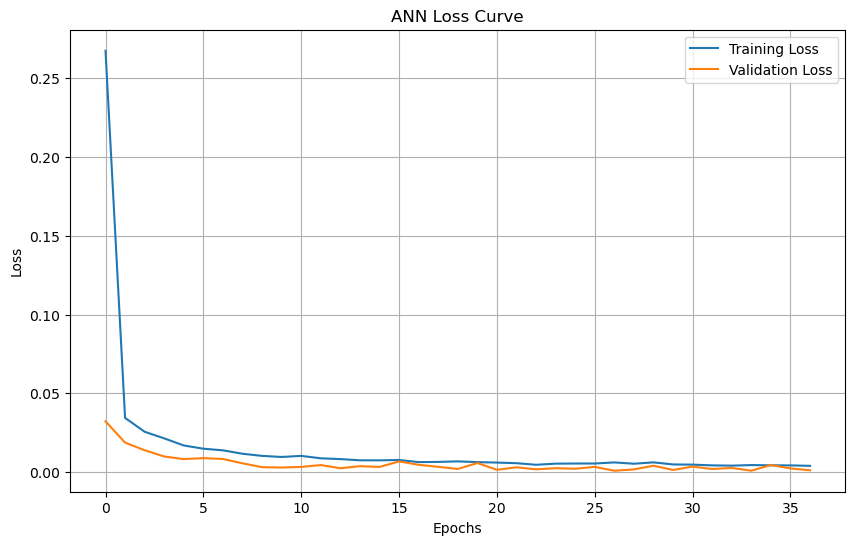

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000026BFF673600> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


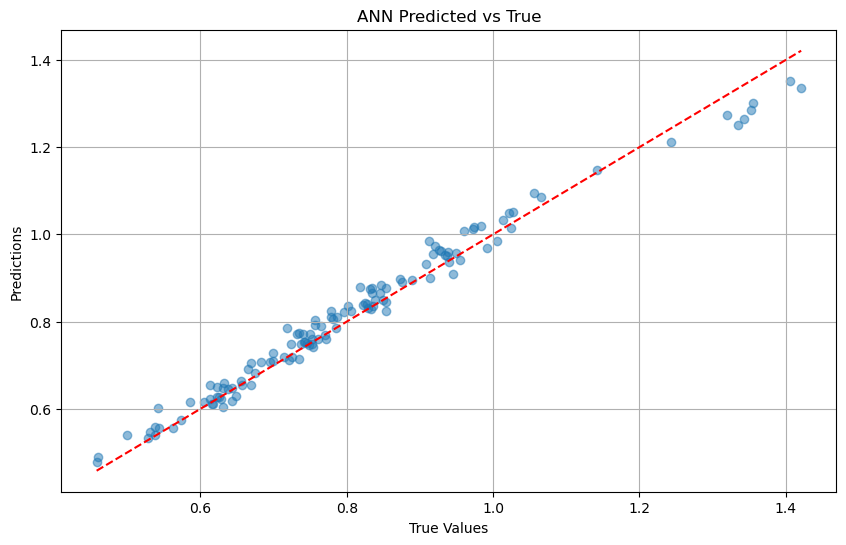

In [40]:
plot_loss_curves(history_ann_hyper, title="ANN Loss Curve")
plot_predictions(model_ann_hyper, X_test, y_test, title="ANN Predicted vs True")

In [41]:
ann_metrics_hyper = model_ann_hyper.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.2695e-04 - mae: 0.0236


In [87]:
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop

# Experimenting with different hyperparameters for RNN model
learning_rates = [1e-5, 1e-4, 1e-3]
rnn_units = [64, 128, 256]
dropout_rates = [0.2, 0.3, 0.4]
epochs = 50
optimizers = [Adam, Nadam, RMSprop]

best_model_rnn = None
best_val_loss_rnn = float('inf')

# Loop over combinations of hyperparameters
for lr in learning_rates:
    for unit in rnn_units:
        for dropout in dropout_rates:
            for optimizer in optimizers:
                print(f"RNN model with learning rate: {lr}, units: {unit}, dropout rate: {dropout}, optimizer: {optimizer}")
                # Define the RNN model with hyperparameters
                model_rnn_tuning = Sequential([
                    SimpleRNN(unit, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
                    Dropout(dropout),
                    SimpleRNN(unit // 2, activation='relu', return_sequences=False),
                    Dense(1, activation='linear')
                ])
                model_rnn_tuning.compile(optimizer=optimizer(learning_rate=lr), loss='mse', metrics=['mae'])

                # Reshape input for RNN
                X_train_rnn = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
                X_val_rnn = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

                # Train the RNN model
                early_stopping_rnn = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
                history_rnn_tuning = model_rnn_tuning.fit(X_train_rnn, y_train, validation_data=(X_val_rnn, y_val),
                                            epochs=epochs, batch_size=32, callbacks=[early_stopping_rnn])

                # Evaluate the model
                val_loss = history_rnn_tuning.history['val_loss'][-1]
                if val_loss < best_val_loss_rnn:
                    best_val_loss_rnn = val_loss
                    best_model_rnn = model_rnn

print(f"Best RNN model with learning rate: {lr}, units: {unit}, dropout rate: {dropout}, optimizer: {optimizer}")


RNN model with learning rate: 1e-05, units: 64, dropout rate: 0.2, optimizer: <class 'keras.src.optimizers.adam.Adam'>
Epoch 1/50


C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.8080 - mae: 0.8743 - val_loss: 0.7910 - val_mae: 0.8698
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7828 - mae: 0.8606 - val_loss: 0.7807 - val_mae: 0.8639
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7773 - mae: 0.8581 - val_loss: 0.7705 - val_mae: 0.8581
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7614 - mae: 0.8488 - val_loss: 0.7608 - val_mae: 0.8526
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7603 - mae: 0.8460 - val_loss: 0.7512 - val_mae: 0.8471
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7411 - mae: 0.8368 - val_loss: 0.7417 - val_mae: 0.8415
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7292 - mae: 0.8296 - val_loss: 0.7325 - val_mae: 0.8361
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7345 - mae: 0.8338 - val_loss: 0.7231 - val_mae: 0.8306
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7170 - mae: 0.8229 - 

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.7499 - mae: 0.8479 - val_loss: 0.7365 - val_mae: 0.8418
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7566 - mae: 0.8506 - val_loss: 0.7309 - val_mae: 0.8385
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7332 - mae: 0.8377 - val_loss: 0.7251 - val_mae: 0.8351
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7368 - mae: 0.8392 - val_loss: 0.7196 - val_mae: 0.8318
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7595 - mae: 0.8498 - val_loss: 0.7139 - val_mae: 0.8285
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7298 - mae: 0.8339 - val_loss: 0.7084 - val_mae: 0.8252
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7196 - mae: 0.8290 - val_loss: 0.7028 - val_mae: 0.8219
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6997 - mae: 0.8169 - val_loss: 0.6973 - val_mae: 0.8186
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7125 - mae: 0.8263 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5107 - mae: 0.6978 - val_loss: 0.5038 - val_mae: 0.6940
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5039 - mae: 0.6915 - val_loss: 0.4928 - val_mae: 0.6861
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4738 - mae: 0.6713 - val_loss: 0.4818 - val_mae: 0.6782
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4770 - mae: 0.6719 - val_loss: 0.4707 - val_mae: 0.6702
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4734 - mae: 0.6679 - val_loss: 0.4600 - val_mae: 0.6623
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4450 - mae: 0.6503 - val_loss: 0.4491 - val_mae: 0.6541
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4446 - mae: 0.6458 - val_loss: 0.4377 - val_mae: 0.6455
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4330 - mae: 0.6380 - val_loss: 0.4264 - val_mae: 0.6368
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4340 - mae: 0.6380 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.6472 - mae: 0.7835 - val_loss: 0.6287 - val_mae: 0.7752
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6264 - mae: 0.7730 - val_loss: 0.6114 - val_mae: 0.7643
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6270 - mae: 0.7688 - val_loss: 0.5946 - val_mae: 0.7535
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6054 - mae: 0.7580 - val_loss: 0.5784 - val_mae: 0.7430
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5907 - mae: 0.7473 - val_loss: 0.5632 - val_mae: 0.7330
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5669 - mae: 0.7341 - val_loss: 0.5483 - val_mae: 0.7230
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5695 - mae: 0.7312 - val_loss: 0.5333 - val_mae: 0.7128
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5522 - mae: 0.7194 - val_loss: 0.5186 - val_mae: 0.7027
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5314 - mae: 0.7051 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 1.0695 - mae: 1.0120 - val_loss: 0.9952 - val_mae: 0.9769
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0561 - mae: 1.0053 - val_loss: 0.9759 - val_mae: 0.9674
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0182 - mae: 0.9863 - val_loss: 0.9570 - val_mae: 0.9580
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0191 - mae: 0.9872 - val_loss: 0.9391 - val_mae: 0.9490
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9827 - mae: 0.9708 - val_loss: 0.9226 - val_mae: 0.9406
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9514 - mae: 0.9535 - val_loss: 0.9074 - val_mae: 0.9327
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9115 - mae: 0.9362 - val_loss: 0.8933 - val_mae: 0.9253
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9040 - mae: 0.9318 - val_loss: 0.8805 - val_mae: 0.9185
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9534 - mae: 0.9522 - 

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.8301 - mae: 0.8893 - val_loss: 0.7929 - val_mae: 0.8716
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8027 - mae: 0.8726 - val_loss: 0.7808 - val_mae: 0.8647
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7983 - mae: 0.8711 - val_loss: 0.7708 - val_mae: 0.8590
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7995 - mae: 0.8738 - val_loss: 0.7603 - val_mae: 0.8530
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7761 - mae: 0.8582 - val_loss: 0.7497 - val_mae: 0.8469
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7655 - mae: 0.8524 - val_loss: 0.7393 - val_mae: 0.8408
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7515 - mae: 0.8455 - val_loss: 0.7287 - val_mae: 0.8345
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7542 - mae: 0.8478 - val_loss: 0.7179 - val_mae: 0.8281
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7399 - mae: 0.8378 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5290 - mae: 0.6882 - val_loss: 0.5463 - val_mae: 0.7199
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4897 - mae: 0.6567 - val_loss: 0.5181 - val_mae: 0.7006
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5016 - mae: 0.6654 - val_loss: 0.4905 - val_mae: 0.6811
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4419 - mae: 0.6187 - val_loss: 0.4653 - val_mae: 0.6628
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4285 - mae: 0.6084 - val_loss: 0.4414 - val_mae: 0.6450
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4080 - mae: 0.6003 - val_loss: 0.4177 - val_mae: 0.6268
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3839 - mae: 0.5768 - val_loss: 0.3943 - val_mae: 0.6082
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3478 - mae: 0.5461 - val_loss: 0.3719 - val_mae: 0.5899
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3376 - mae: 0.5351 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.9485 - mae: 0.9537 - val_loss: 0.8768 - val_mae: 0.9181
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9405 - mae: 0.9458 - val_loss: 0.8668 - val_mae: 0.9127
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9079 - mae: 0.9301 - val_loss: 0.8572 - val_mae: 0.9075
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9184 - mae: 0.9353 - val_loss: 0.8479 - val_mae: 0.9025
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8906 - mae: 0.9220 - val_loss: 0.8392 - val_mae: 0.8978
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8859 - mae: 0.9194 - val_loss: 0.8312 - val_mae: 0.8933
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8595 - mae: 0.9067 - val_loss: 0.8233 - val_mae: 0.8890
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8574 - mae: 0.9043 - val_loss: 0.8156 - val_mae: 0.8847
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8489 - mae: 0.8990 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.6116 - mae: 0.7605 - val_loss: 0.5926 - val_mae: 0.7536
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6252 - mae: 0.7708 - val_loss: 0.5839 - val_mae: 0.7479
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6211 - mae: 0.7663 - val_loss: 0.5757 - val_mae: 0.7426
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5849 - mae: 0.7440 - val_loss: 0.5678 - val_mae: 0.7374
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5862 - mae: 0.7446 - val_loss: 0.5598 - val_mae: 0.7320
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5798 - mae: 0.7394 - val_loss: 0.5517 - val_mae: 0.7266
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5714 - mae: 0.7334 - val_loss: 0.5433 - val_mae: 0.7209
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5688 - mae: 0.7322 - val_loss: 0.5352 - val_mae: 0.7154
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5543 - mae: 0.7253 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.7330 - mae: 0.8339 - val_loss: 0.7192 - val_mae: 0.8295
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7258 - mae: 0.8329 - val_loss: 0.6994 - val_mae: 0.8178
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7028 - mae: 0.8186 - val_loss: 0.6795 - val_mae: 0.8058
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6721 - mae: 0.7986 - val_loss: 0.6588 - val_mae: 0.7932
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6532 - mae: 0.7876 - val_loss: 0.6377 - val_mae: 0.7801
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6123 - mae: 0.7609 - val_loss: 0.6158 - val_mae: 0.7663
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6023 - mae: 0.7534 - val_loss: 0.5930 - val_mae: 0.7516
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5859 - mae: 0.7437 - val_loss: 0.5689 - val_mae: 0.7356
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5512 - mae: 0.7183 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.7419 - mae: 0.8407 - val_loss: 0.7480 - val_mae: 0.8468
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7232 - mae: 0.8298 - val_loss: 0.7169 - val_mae: 0.8287
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7087 - mae: 0.8202 - val_loss: 0.6853 - val_mae: 0.8098
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6443 - mae: 0.7830 - val_loss: 0.6531 - val_mae: 0.7903
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6216 - mae: 0.7679 - val_loss: 0.6209 - val_mae: 0.7701
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6008 - mae: 0.7548 - val_loss: 0.5896 - val_mae: 0.7500
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5474 - mae: 0.7183 - val_loss: 0.5582 - val_mae: 0.7291
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5266 - mae: 0.7047 - val_loss: 0.5268 - val_mae: 0.7075
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5070 - mae: 0.6895 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.9053 - mae: 0.9306 - val_loss: 0.8503 - val_mae: 0.9043
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8514 - mae: 0.9033 - val_loss: 0.8251 - val_mae: 0.8905
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8316 - mae: 0.8903 - val_loss: 0.8012 - val_mae: 0.8774
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8074 - mae: 0.8787 - val_loss: 0.7778 - val_mae: 0.8643
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7835 - mae: 0.8675 - val_loss: 0.7555 - val_mae: 0.8516
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7584 - mae: 0.8499 - val_loss: 0.7347 - val_mae: 0.8396
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7233 - mae: 0.8322 - val_loss: 0.7151 - val_mae: 0.8281
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7207 - mae: 0.8312 - val_loss: 0.6958 - val_mae: 0.8166
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7102 - mae: 0.8247 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5041 - mae: 0.6857 - val_loss: 0.4580 - val_mae: 0.6595
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4239 - mae: 0.6269 - val_loss: 0.4024 - val_mae: 0.6166
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3749 - mae: 0.5901 - val_loss: 0.3511 - val_mae: 0.5742
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3333 - mae: 0.5490 - val_loss: 0.3039 - val_mae: 0.5321
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2989 - mae: 0.5151 - val_loss: 0.2606 - val_mae: 0.4901
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2572 - mae: 0.4770 - val_loss: 0.2213 - val_mae: 0.4484
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2138 - mae: 0.4310 - val_loss: 0.1865 - val_mae: 0.4074
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1833 - mae: 0.3913 - val_loss: 0.1553 - val_mae: 0.3664
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1465 - mae: 0.3437 - 

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.5706 - mae: 0.7318 - val_loss: 0.6141 - val_mae: 0.7629
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5335 - mae: 0.7074 - val_loss: 0.5890 - val_mae: 0.7467
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5221 - mae: 0.6986 - val_loss: 0.5627 - val_mae: 0.7292
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5060 - mae: 0.6861 - val_loss: 0.5350 - val_mae: 0.7104
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4653 - mae: 0.6555 - val_loss: 0.5065 - val_mae: 0.6904
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4275 - mae: 0.6273 - val_loss: 0.4760 - val_mae: 0.6683
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4083 - mae: 0.6114 - val_loss: 0.4425 - val_mae: 0.6432
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3866 - mae: 0.5948 - val_loss: 0.4080 - val_mae: 0.6162
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3481 - mae: 0.5571 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.9247 - mae: 0.9419 - val_loss: 0.8765 - val_mae: 0.9188
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8770 - mae: 0.9157 - val_loss: 0.8494 - val_mae: 0.9042
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8714 - mae: 0.9141 - val_loss: 0.8228 - val_mae: 0.8896
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8268 - mae: 0.8918 - val_loss: 0.7967 - val_mae: 0.8752
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8170 - mae: 0.8813 - val_loss: 0.7696 - val_mae: 0.8598
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7696 - mae: 0.8563 - val_loss: 0.7434 - val_mae: 0.8446
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7432 - mae: 0.8408 - val_loss: 0.7167 - val_mae: 0.8289
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7221 - mae: 0.8292 - val_loss: 0.6910 - val_mae: 0.8134
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6944 - mae: 0.8138 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.9485 - mae: 0.9523 - val_loss: 0.8728 - val_mae: 0.9183
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8885 - mae: 0.9234 - val_loss: 0.8456 - val_mae: 0.9037
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8930 - mae: 0.9247 - val_loss: 0.8198 - val_mae: 0.8897
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8467 - mae: 0.9020 - val_loss: 0.7951 - val_mae: 0.8761
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8229 - mae: 0.8887 - val_loss: 0.7708 - val_mae: 0.8625
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7944 - mae: 0.8702 - val_loss: 0.7469 - val_mae: 0.8489
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7615 - mae: 0.8537 - val_loss: 0.7229 - val_mae: 0.8349
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7506 - mae: 0.8465 - val_loss: 0.7002 - val_mae: 0.8214
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7369 - mae: 0.8372 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.9679 - mae: 0.9635 - val_loss: 0.9364 - val_mae: 0.9497
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9962 - mae: 0.9746 - val_loss: 0.9120 - val_mae: 0.9370
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9547 - mae: 0.9557 - val_loss: 0.8885 - val_mae: 0.9245
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9073 - mae: 0.9340 - val_loss: 0.8660 - val_mae: 0.9125
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9227 - mae: 0.9403 - val_loss: 0.8448 - val_mae: 0.9010
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8896 - mae: 0.9198 - val_loss: 0.8255 - val_mae: 0.8904
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8778 - mae: 0.9165 - val_loss: 0.8066 - val_mae: 0.8798
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8428 - mae: 0.8983 - val_loss: 0.7888 - val_mae: 0.8699
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8335 - mae: 0.8916 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.8117 - mae: 0.8799 - val_loss: 0.7492 - val_mae: 0.8484
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8224 - mae: 0.8870 - val_loss: 0.7384 - val_mae: 0.8421
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8085 - mae: 0.8775 - val_loss: 0.7280 - val_mae: 0.8360
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7722 - mae: 0.8573 - val_loss: 0.7178 - val_mae: 0.8301
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7644 - mae: 0.8533 - val_loss: 0.7085 - val_mae: 0.8245
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7483 - mae: 0.8458 - val_loss: 0.6991 - val_mae: 0.8190
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7516 - mae: 0.8481 - val_loss: 0.6902 - val_mae: 0.8136
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7533 - mae: 0.8470 - val_loss: 0.6818 - val_mae: 0.8086
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7266 - mae: 0.8321 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.7542 - mae: 0.8497 - val_loss: 0.7120 - val_mae: 0.8267
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6977 - mae: 0.8165 - val_loss: 0.6694 - val_mae: 0.8012
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6610 - mae: 0.7944 - val_loss: 0.6227 - val_mae: 0.7721
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6152 - mae: 0.7660 - val_loss: 0.5657 - val_mae: 0.7348
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5559 - mae: 0.7246 - val_loss: 0.5000 - val_mae: 0.6892
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5058 - mae: 0.6914 - val_loss: 0.4287 - val_mae: 0.6358
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4142 - mae: 0.6228 - val_loss: 0.3514 - val_mae: 0.5719
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3286 - mae: 0.5491 - val_loss: 0.2717 - val_mae: 0.4969
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2602 - mae: 0.479

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.7032 - mae: 0.8210 - val_loss: 0.6753 - val_mae: 0.8055
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6443 - mae: 0.7843 - val_loss: 0.6257 - val_mae: 0.7748
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5986 - mae: 0.7563 - val_loss: 0.5771 - val_mae: 0.7434
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5589 - mae: 0.7284 - val_loss: 0.5293 - val_mae: 0.7110
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5228 - mae: 0.7029 - val_loss: 0.4799 - val_mae: 0.6759
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4594 - mae: 0.6597 - val_loss: 0.4280 - val_mae: 0.6369
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4167 - mae: 0.6259 - val_loss: 0.3713 - val_mae: 0.5911
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3477 - mae: 0.5690 - val_loss: 0.3096 - val_mae: 0.5367
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2772 - mae: 0.5039

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.6052 - mae: 0.7582 - val_loss: 0.5597 - val_mae: 0.7310
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5230 - mae: 0.7015 - val_loss: 0.5001 - val_mae: 0.6898
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4675 - mae: 0.6625 - val_loss: 0.4405 - val_mae: 0.6459
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4217 - mae: 0.6283 - val_loss: 0.3791 - val_mae: 0.5969
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3596 - mae: 0.5769 - val_loss: 0.3194 - val_mae: 0.5449
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3011 - mae: 0.5216 - val_loss: 0.2612 - val_mae: 0.4883
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2379 - mae: 0.4573 - val_loss: 0.2047 - val_mae: 0.4257
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1886 - mae: 0.4017 - val_loss: 0.1514 - val_mae: 0.3562
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1319 - mae: 0.322

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.7812 - mae: 0.8633 - val_loss: 0.7207 - val_mae: 0.8316
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7123 - mae: 0.8239 - val_loss: 0.6811 - val_mae: 0.8079
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6985 - mae: 0.8165 - val_loss: 0.6437 - val_mae: 0.7849
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6661 - mae: 0.7957 - val_loss: 0.6078 - val_mae: 0.7621
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6185 - mae: 0.7677 - val_loss: 0.5723 - val_mae: 0.7389
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5753 - mae: 0.7382 - val_loss: 0.5353 - val_mae: 0.7137
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5416 - mae: 0.7138 - val_loss: 0.4951 - val_mae: 0.6852
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5255 - mae: 0.7029 - val_loss: 0.4499 - val_mae: 0.6515
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4425 - mae: 0.642

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.6810 - mae: 0.8066 - val_loss: 0.6419 - val_mae: 0.7850
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6297 - mae: 0.7752 - val_loss: 0.6042 - val_mae: 0.7611
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5963 - mae: 0.7537 - val_loss: 0.5650 - val_mae: 0.7355
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5659 - mae: 0.7344 - val_loss: 0.5238 - val_mae: 0.7075
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5099 - mae: 0.6952 - val_loss: 0.4804 - val_mae: 0.6767
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4546 - mae: 0.6579 - val_loss: 0.4333 - val_mae: 0.6413
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4356 - mae: 0.6370 - val_loss: 0.3817 - val_mae: 0.6000
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3683 - mae: 0.5863 - val_loss: 0.3246 - val_mae: 0.5504
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3058 - mae: 0.52

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.7551 - mae: 0.8486 - val_loss: 0.7013 - val_mae: 0.8196
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6709 - mae: 0.7999 - val_loss: 0.6436 - val_mae: 0.7846
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6359 - mae: 0.7775 - val_loss: 0.5861 - val_mae: 0.7482
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5833 - mae: 0.7440 - val_loss: 0.5319 - val_mae: 0.7120
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5299 - mae: 0.7066 - val_loss: 0.4790 - val_mae: 0.6747
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4706 - mae: 0.6652 - val_loss: 0.4265 - val_mae: 0.6355
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4219 - mae: 0.6275 - val_loss: 0.3783 - val_mae: 0.5970
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3725 - mae: 0.5905 - val_loss: 0.3297 - val_mae: 0.5554
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3272 - mae: 0.5

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.7433 - mae: 0.8407 - val_loss: 0.7452 - val_mae: 0.8450
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7118 - mae: 0.8237 - val_loss: 0.7009 - val_mae: 0.8191
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6551 - mae: 0.7879 - val_loss: 0.6552 - val_mae: 0.7915
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6142 - mae: 0.7657 - val_loss: 0.6093 - val_mae: 0.7627
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5666 - mae: 0.7307 - val_loss: 0.5623 - val_mae: 0.7319
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5338 - mae: 0.7094 - val_loss: 0.5135 - val_mae: 0.6985
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4883 - mae: 0.6764 - val_loss: 0.4625 - val_mae: 0.6617
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4182 - mae: 0.6237 - val_loss: 0.4089 - val_mae: 0.6205
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3837 - mae: 0.5

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.8713 - mae: 0.9123 - val_loss: 0.8195 - val_mae: 0.8872
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8392 - mae: 0.8927 - val_loss: 0.7597 - val_mae: 0.8537
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7676 - mae: 0.8565 - val_loss: 0.7019 - val_mae: 0.8199
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7090 - mae: 0.8200 - val_loss: 0.6447 - val_mae: 0.7851
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6575 - mae: 0.7885 - val_loss: 0.5860 - val_mae: 0.7477
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5933 - mae: 0.7469 - val_loss: 0.5239 - val_mae: 0.7057
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5091 - mae: 0.6899 - val_loss: 0.4567 - val_mae: 0.6568
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4608 - mae: 0.6537 - val_loss: 0.3827 - val_mae: 0.5980
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3771 - mae: 0.58

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.5330 - mae: 0.7103 - val_loss: 0.4719 - val_mae: 0.6701
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4643 - mae: 0.6617 - val_loss: 0.4118 - val_mae: 0.6244
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4122 - mae: 0.6190 - val_loss: 0.3575 - val_mae: 0.5797
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3518 - mae: 0.5668 - val_loss: 0.3053 - val_mae: 0.5330
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3015 - mae: 0.5183 - val_loss: 0.2514 - val_mae: 0.4797
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2434 - mae: 0.4659 - val_loss: 0.1996 - val_mae: 0.4216
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1709 - mae: 0.3782 - val_loss: 0.1507 - val_mae: 0.3575
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1453 - mae: 0.3385 - val_loss: 0.1086 - val_mae: 0.2906
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1007 - mae: 0.

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.6047 - mae: 0.7613 - val_loss: 0.5455 - val_mae: 0.7227
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5251 - mae: 0.7073 - val_loss: 0.4623 - val_mae: 0.6639
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4326 - mae: 0.6374 - val_loss: 0.3684 - val_mae: 0.5900
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3268 - mae: 0.5513 - val_loss: 0.2505 - val_mae: 0.4803
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2011 - mae: 0.4230 - val_loss: 0.1127 - val_mae: 0.3032
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0885 - mae: 0.2515 - val_loss: 0.0301 - val_mae: 0.1359
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0522 - mae: 0.1727 - val_loss: 0.0258 - val_mae: 0.1262
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0339 - mae: 0.1452 - val_loss: 0.0257 - val_mae: 0.1215
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0343 - mae: 0.1438 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6733 - mae: 0.8028 - val_loss: 0.6313 - val_mae: 0.7781
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6156 - mae: 0.7646 - val_loss: 0.5599 - val_mae: 0.7316
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5501 - mae: 0.7214 - val_loss: 0.4762 - val_mae: 0.6727
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4537 - mae: 0.6540 - val_loss: 0.3699 - val_mae: 0.5892
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3369 - mae: 0.5555 - val_loss: 0.2360 - val_mae: 0.4640
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1934 - mae: 0.4062 - val_loss: 0.0953 - val_mae: 0.2741
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0709 - mae: 0.2209 - val_loss: 0.0285 - val_mae: 0.1325
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0417 - mae: 0.1607 - val_loss: 0.0286 - val_mae: 0.1302
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0438 - mae: 0.1635 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.8349 - mae: 0.8938 - val_loss: 0.6667 - val_mae: 0.7995
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6804 - mae: 0.8053 - val_loss: 0.5388 - val_mae: 0.7175
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5526 - mae: 0.7247 - val_loss: 0.4242 - val_mae: 0.6352
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4379 - mae: 0.6404 - val_loss: 0.3239 - val_mae: 0.5530
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3353 - mae: 0.5551 - val_loss: 0.2277 - val_mae: 0.4602
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2233 - mae: 0.4477 - val_loss: 0.1363 - val_mae: 0.3489
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1311 - mae: 0.3296 - val_loss: 0.0618 - val_mae: 0.2183
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0572 - mae: 0.1942 - val_loss: 0.0215 - val_mae: 0.1121
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0301 - mae: 0.1366 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.8393 - mae: 0.8899 - val_loss: 0.6318 - val_mae: 0.7780
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5328 - mae: 0.7013 - val_loss: 0.3951 - val_mae: 0.6101
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3366 - mae: 0.5423 - val_loss: 0.1958 - val_mae: 0.4144
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1563 - mae: 0.3482 - val_loss: 0.0735 - val_mae: 0.2234
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0861 - mae: 0.2398 - val_loss: 0.0427 - val_mae: 0.1693
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0669 - mae: 0.2043 - val_loss: 0.0382 - val_mae: 0.1588
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0604 - mae: 0.1921 - val_loss: 0.0362 - val_mae: 0.1523
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0540 - mae: 0.1805 - val_loss: 0.0351 - val_mae: 0.1484
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0592 - mae: 0.1891 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.7418 - mae: 0.8428 - val_loss: 0.7097 - val_mae: 0.8247
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6742 - mae: 0.8012 - val_loss: 0.6310 - val_mae: 0.7766
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5888 - mae: 0.7445 - val_loss: 0.5030 - val_mae: 0.6900
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4188 - mae: 0.6151 - val_loss: 0.2945 - val_mae: 0.5173
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1909 - mae: 0.3962 - val_loss: 0.1020 - val_mae: 0.2651
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0694 - mae: 0.2088 - val_loss: 0.0446 - val_mae: 0.1687
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0659 - mae: 0.2013 - val_loss: 0.0485 - val_mae: 0.1718
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0576 - mae: 0.1884 - val_loss: 0.0463 - val_mae: 0.1672
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0482 - mae: 0.1675 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.7198 - mae: 0.8252 - val_loss: 0.6146 - val_mae: 0.7671
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5854 - mae: 0.7466 - val_loss: 0.5448 - val_mae: 0.7212
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5240 - mae: 0.7028 - val_loss: 0.4659 - val_mae: 0.6650
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4265 - mae: 0.6268 - val_loss: 0.3601 - val_mae: 0.5803
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3204 - mae: 0.5362 - val_loss: 0.2365 - val_mae: 0.4609
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1991 - mae: 0.3995 - val_loss: 0.1228 - val_mae: 0.3099
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1071 - mae: 0.2765 - val_loss: 0.0566 - val_mae: 0.1900
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0769 - mae: 0.2220 - val_loss: 0.0414 - val_mae: 0.1638
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0679 - mae: 0.2055 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.7051 - mae: 0.8116 - val_loss: 0.5046 - val_mae: 0.6942
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4990 - mae: 0.6773 - val_loss: 0.3296 - val_mae: 0.5574
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3304 - mae: 0.5447 - val_loss: 0.1731 - val_mae: 0.3937
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1840 - mae: 0.3918 - val_loss: 0.0732 - val_mae: 0.2332
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1051 - mae: 0.2718 - val_loss: 0.0314 - val_mae: 0.1397
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0552 - mae: 0.1869 - val_loss: 0.0245 - val_mae: 0.1235
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0457 - mae: 0.1657 - val_loss: 0.0227 - val_mae: 0.1187
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0415 - mae: 0.1615 - val_loss: 0.0215 - val_mae: 0.1156
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0505 - mae: 0.1735 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.7250 - mae: 0.8331 - val_loss: 0.6321 - val_mae: 0.7783
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6503 - mae: 0.7865 - val_loss: 0.5387 - val_mae: 0.7170
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5605 - mae: 0.7295 - val_loss: 0.4415 - val_mae: 0.6462
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4443 - mae: 0.6435 - val_loss: 0.2943 - val_mae: 0.5201
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2705 - mae: 0.4857 - val_loss: 0.1087 - val_mae: 0.2873
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1001 - mae: 0.2606 - val_loss: 0.0353 - val_mae: 0.1539
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0699 - mae: 0.2084 - val_loss: 0.0330 - val_mae: 0.1467
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0636 - mae: 0.1998 - val_loss: 0.0327 - val_mae: 0.1419
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0561 - mae: 0.1852 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3802 - mae: 0.5772 - val_loss: 0.2331 - val_mae: 0.4512
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2201 - mae: 0.3999 - val_loss: 0.1035 - val_mae: 0.2688
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1343 - mae: 0.2961 - val_loss: 0.0639 - val_mae: 0.2037
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1061 - mae: 0.2623 - val_loss: 0.0528 - val_mae: 0.1837
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1001 - mae: 0.2549 - val_loss: 0.0441 - val_mae: 0.1672
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0750 - mae: 0.2150 - val_loss: 0.0342 - val_mae: 0.1474
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0718 - mae: 0.2130 - val_loss: 0.0346 - val_mae: 0.1454
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0667 - mae: 0.2030 - val_loss: 0.0282 - val_mae: 0.1305
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0737 - mae: 0.2080 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.8090 - mae: 0.8796 - val_loss: 0.6390 - val_mae: 0.7825
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5873 - mae: 0.7489 - val_loss: 0.4531 - val_mae: 0.6553
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3924 - mae: 0.6037 - val_loss: 0.2220 - val_mae: 0.4451
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1465 - mae: 0.3382 - val_loss: 0.0430 - val_mae: 0.1702
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0561 - mae: 0.1846 - val_loss: 0.0364 - val_mae: 0.1533
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0392 - mae: 0.1559 - val_loss: 0.0309 - val_mae: 0.1387
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0357 - mae: 0.1455 - val_loss: 0.0262 - val_mae: 0.1255
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0305 - mae: 0.1368 - val_loss: 0.0218 - val_mae: 0.1143
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0264 - mae: 0.1255 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.8887 - mae: 0.9188 - val_loss: 0.6264 - val_mae: 0.7726
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5250 - mae: 0.6995 - val_loss: 0.2524 - val_mae: 0.4751
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1788 - mae: 0.3816 - val_loss: 0.0468 - val_mae: 0.1754
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0533 - mae: 0.1791 - val_loss: 0.0396 - val_mae: 0.1613
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0453 - mae: 0.1701 - val_loss: 0.0361 - val_mae: 0.1509
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0440 - mae: 0.1596 - val_loss: 0.0296 - val_mae: 0.1362
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0334 - mae: 0.1419 - val_loss: 0.0256 - val_mae: 0.1251
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0331 - mae: 0.1384 - val_loss: 0.0217 - val_mae: 0.1139
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0259 - mae: 0.1242 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.7182 - mae: 0.8261 - val_loss: 0.5248 - val_mae: 0.7073
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4904 - mae: 0.6787 - val_loss: 0.3150 - val_mae: 0.5409
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2619 - mae: 0.4765 - val_loss: 0.0834 - val_mae: 0.2441
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0639 - mae: 0.2025 - val_loss: 0.0362 - val_mae: 0.1519
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0447 - mae: 0.1657 - val_loss: 0.0283 - val_mae: 0.1321
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0340 - mae: 0.1432 - val_loss: 0.0231 - val_mae: 0.1194
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0273 - mae: 0.1272 - val_loss: 0.0184 - val_mae: 0.1075
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0258 - mae: 0.1276 - val_loss: 0.0181 - val_mae: 0.0996
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0264 - mae: 0.1232 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4133 - mae: 0.6178 - val_loss: 0.2198 - val_mae: 0.4401
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1555 - mae: 0.3509 - val_loss: 0.0514 - val_mae: 0.1851
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0688 - mae: 0.2074 - val_loss: 0.0432 - val_mae: 0.1691
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0541 - mae: 0.1837 - val_loss: 0.0342 - val_mae: 0.1492
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0440 - mae: 0.1664 - val_loss: 0.0283 - val_mae: 0.1341
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0359 - mae: 0.1507 - val_loss: 0.0232 - val_mae: 0.1201
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0330 - mae: 0.1403 - val_loss: 0.0196 - val_mae: 0.1105
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0310 - mae: 0.1366 - val_loss: 0.0181 - val_mae: 0.1042
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0315 - mae: 0.1344 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.6096 - mae: 0.7607 - val_loss: 0.4867 - val_mae: 0.6783
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3458 - mae: 0.5570 - val_loss: 0.1402 - val_mae: 0.3302
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0805 - mae: 0.2313 - val_loss: 0.0527 - val_mae: 0.1826
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0611 - mae: 0.1932 - val_loss: 0.0523 - val_mae: 0.1794
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - mae: 0.1721 - val_loss: 0.0384 - val_mae: 0.1527
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0382 - mae: 0.1503 - val_loss: 0.0366 - val_mae: 0.1460
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0411 - mae: 0.1552 - val_loss: 0.0303 - val_mae: 0.1329
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0300 - mae: 0.1322 - val_loss: 0.0271 - val_mae: 0.1245
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0370 - mae: 0.1473 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.4887 - mae: 0.6762 - val_loss: 0.2356 - val_mae: 0.4606
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1792 - mae: 0.3758 - val_loss: 0.0454 - val_mae: 0.1703
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0510 - mae: 0.1815 - val_loss: 0.0314 - val_mae: 0.1429
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0390 - mae: 0.1542 - val_loss: 0.0276 - val_mae: 0.1312
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0334 - mae: 0.1412 - val_loss: 0.0221 - val_mae: 0.1140
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0274 - mae: 0.1320 - val_loss: 0.0252 - val_mae: 0.1192
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0268 - mae: 0.1262 - val_loss: 0.0172 - val_mae: 0.0973
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0253 - mae: 0.1215 - val_loss: 0.0142 - val_mae: 0.0901
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - mae: 0.1079 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6716 - mae: 0.7993 - val_loss: 0.5263 - val_mae: 0.7073
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4929 - mae: 0.6802 - val_loss: 0.3677 - val_mae: 0.5871
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3263 - mae: 0.5389 - val_loss: 0.1822 - val_mae: 0.4001
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1285 - mae: 0.3055 - val_loss: 0.0343 - val_mae: 0.1500
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0655 - mae: 0.1987 - val_loss: 0.0397 - val_mae: 0.1516
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0463 - mae: 0.1726 - val_loss: 0.0300 - val_mae: 0.1323
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - mae: 0.1588 - val_loss: 0.0262 - val_mae: 0.1231
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0352 - mae: 0.1472 - val_loss: 0.0266 - val_mae: 0.1221
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0342 - mae: 0.1435 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.7894 - mae: 0.8622 - val_loss: 0.5636 - val_mae: 0.7304
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5148 - mae: 0.6865 - val_loss: 0.2454 - val_mae: 0.4666
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1723 - mae: 0.3586 - val_loss: 0.0592 - val_mae: 0.1954
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0791 - mae: 0.2192 - val_loss: 0.0557 - val_mae: 0.1865
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0701 - mae: 0.2051 - val_loss: 0.0506 - val_mae: 0.1760
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0641 - mae: 0.1944 - val_loss: 0.0489 - val_mae: 0.1723
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0645 - mae: 0.1990 - val_loss: 0.0406 - val_mae: 0.1546
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0460 - mae: 0.1668 - val_loss: 0.0328 - val_mae: 0.1376
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0509 - mae: 0.1713 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.8671 - mae: 0.9080 - val_loss: 0.6689 - val_mae: 0.8006
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6351 - mae: 0.7769 - val_loss: 0.4679 - val_mae: 0.6651
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4060 - mae: 0.6063 - val_loss: 0.2023 - val_mae: 0.4158
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1477 - mae: 0.3324 - val_loss: 0.0620 - val_mae: 0.1998
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0712 - mae: 0.2074 - val_loss: 0.0454 - val_mae: 0.1696
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0651 - mae: 0.2035 - val_loss: 0.0366 - val_mae: 0.1515
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0554 - mae: 0.1815 - val_loss: 0.0300 - val_mae: 0.1357
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0498 - mae: 0.1753 - val_loss: 0.0270 - val_mae: 0.1338
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0505 - mae: 0.1787 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.7783 - mae: 0.8589 - val_loss: 0.4275 - val_mae: 0.6348
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3368 - mae: 0.5427 - val_loss: 0.0454 - val_mae: 0.1716
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0543 - mae: 0.1807 - val_loss: 0.0321 - val_mae: 0.1426
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0312 - mae: 0.1402 - val_loss: 0.0230 - val_mae: 0.1209
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0270 - mae: 0.1286 - val_loss: 0.0184 - val_mae: 0.1025
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0223 - mae: 0.1155 - val_loss: 0.0151 - val_mae: 0.0946
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0196 - mae: 0.1066 - val_loss: 0.0142 - val_mae: 0.0858
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0190 - mae: 0.1054 - val_loss: 0.0126 - val_mae: 0.0798
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0169 - mae: 0.09

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.6110 - mae: 0.7526 - val_loss: 0.2434 - val_mae: 0.4649
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1356 - mae: 0.3155 - val_loss: 0.0529 - val_mae: 0.1857
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0575 - mae: 0.1844 - val_loss: 0.0314 - val_mae: 0.1385
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0359 - mae: 0.1488 - val_loss: 0.0224 - val_mae: 0.1176
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0291 - mae: 0.1260 - val_loss: 0.0183 - val_mae: 0.1032
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0230 - mae: 0.1179 - val_loss: 0.0164 - val_mae: 0.0946
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0188 - mae: 0.1047 - val_loss: 0.0147 - val_mae: 0.0876
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0181 - mae: 0.1026 - val_loss: 0.0117 - val_mae: 0.0793
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0142 - mae: 0.

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.7719 - mae: 0.8545 - val_loss: 0.3300 - val_mae: 0.5545
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2315 - mae: 0.4335 - val_loss: 0.0590 - val_mae: 0.1897
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0506 - mae: 0.1701 - val_loss: 0.0263 - val_mae: 0.1310
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0326 - mae: 0.1392 - val_loss: 0.0186 - val_mae: 0.1086
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0224 - mae: 0.1170 - val_loss: 0.0284 - val_mae: 0.1435
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0210 - mae: 0.1094 - val_loss: 0.0131 - val_mae: 0.0843
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0160 - mae: 0.0997 - val_loss: 0.0137 - val_mae: 0.0968
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0155 - mae: 0.0962 - val_loss: 0.0100 - val_mae: 0.0808
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0142 - mae: 0.

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.6019 - mae: 0.7507 - val_loss: 0.1767 - val_mae: 0.3885
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1107 - mae: 0.2802 - val_loss: 0.0447 - val_mae: 0.1684
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0454 - mae: 0.1658 - val_loss: 0.0318 - val_mae: 0.1392
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0350 - mae: 0.1455 - val_loss: 0.0207 - val_mae: 0.1112
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0268 - mae: 0.1225 - val_loss: 0.0166 - val_mae: 0.0977
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0195 - mae: 0.1075 - val_loss: 0.0159 - val_mae: 0.0908
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0176 - mae: 0.1026 - val_loss: 0.0127 - val_mae: 0.0902
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0190 - mae: 0.1054 - val_loss: 0.0105 - val_mae: 0.0784
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0154 - mae: 0.0

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.5946 - mae: 0.7501 - val_loss: 0.2694 - val_mae: 0.4953
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1697 - mae: 0.3634 - val_loss: 0.0474 - val_mae: 0.1739
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0507 - mae: 0.1744 - val_loss: 0.0304 - val_mae: 0.1357
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0337 - mae: 0.1413 - val_loss: 0.0226 - val_mae: 0.1143
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0272 - mae: 0.1283 - val_loss: 0.0174 - val_mae: 0.1003
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0221 - mae: 0.1170 - val_loss: 0.0174 - val_mae: 0.0957
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0242 - mae: 0.1184 - val_loss: 0.0144 - val_mae: 0.0869
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0198 - mae: 0.1087 - val_loss: 0.0112 - val_mae: 0.0775
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0154 - mae: 0.0

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3870 - mae: 0.5719 - val_loss: 0.0599 - val_mae: 0.1963
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0448 - mae: 0.1747 - val_loss: 0.0392 - val_mae: 0.1588
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0350 - mae: 0.1450 - val_loss: 0.0196 - val_mae: 0.1070
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0234 - mae: 0.1139 - val_loss: 0.0296 - val_mae: 0.1471
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0269 - mae: 0.1220 - val_loss: 0.0285 - val_mae: 0.1317
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0199 - mae: 0.1109 - val_loss: 0.0120 - val_mae: 0.0757
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0159 - mae: 0.0958 - val_loss: 0.0119 - val_mae: 0.0742
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0156 - mae: 0.0967 - val_loss: 0.0223 - val_mae: 0.1209
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0143 - mae: 0.0907

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5303 - mae: 0.7028 - val_loss: 0.1918 - val_mae: 0.4044
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1112 - mae: 0.2816 - val_loss: 0.0432 - val_mae: 0.1698
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0487 - mae: 0.1745 - val_loss: 0.0346 - val_mae: 0.1477
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0402 - mae: 0.1545 - val_loss: 0.0250 - val_mae: 0.1258
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0339 - mae: 0.1422 - val_loss: 0.0204 - val_mae: 0.1101
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0285 - mae: 0.1280 - val_loss: 0.0186 - val_mae: 0.1007
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0249 - mae: 0.1219 - val_loss: 0.0152 - val_mae: 0.0914
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0205 - mae: 0.1098 - val_loss: 0.0139 - val_mae: 0.0863
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0204 - mae: 0.1

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.6204 - mae: 0.7705 - val_loss: 0.3091 - val_mae: 0.5355
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1979 - mae: 0.3985 - val_loss: 0.0426 - val_mae: 0.1637
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0470 - mae: 0.1694 - val_loss: 0.0327 - val_mae: 0.1414
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0382 - mae: 0.1498 - val_loss: 0.0261 - val_mae: 0.1248
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0347 - mae: 0.1481 - val_loss: 0.0266 - val_mae: 0.1214
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0294 - mae: 0.1316 - val_loss: 0.0181 - val_mae: 0.1028
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0295 - mae: 0.1283 - val_loss: 0.0191 - val_mae: 0.0995
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0233 - mae: 0.1200 - val_loss: 0.0147 - val_mae: 0.0921
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0219 - mae: 0.

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4980 - mae: 0.6708 - val_loss: 0.0405 - val_mae: 0.1605
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0475 - mae: 0.1779 - val_loss: 0.0311 - val_mae: 0.1395
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0380 - mae: 0.1524 - val_loss: 0.0188 - val_mae: 0.1080
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0256 - mae: 0.1244 - val_loss: 0.0216 - val_mae: 0.1226
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0286 - mae: 0.1302 - val_loss: 0.0117 - val_mae: 0.0804
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0190 - mae: 0.1067 - val_loss: 0.0149 - val_mae: 0.0866
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0169 - mae: 0.0997 - val_loss: 0.0325 - val_mae: 0.1630
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0220 - mae: 0.1118 - val_loss: 0.0126 - val_mae: 0.0800
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0168 - mae: 0.

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.6590 - mae: 0.7517 - val_loss: 0.0746 - val_mae: 0.2145
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0868 - mae: 0.2192 - val_loss: 0.0329 - val_mae: 0.1409
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0397 - mae: 0.1557 - val_loss: 0.0228 - val_mae: 0.1133
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0348 - mae: 0.1457 - val_loss: 0.0205 - val_mae: 0.1038
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0294 - mae: 0.1283 - val_loss: 0.0138 - val_mae: 0.0902
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0253 - mae: 0.1283 - val_loss: 0.0134 - val_mae: 0.0827
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0182 - mae: 0.1067 - val_loss: 0.0117 - val_mae: 0.0763
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mae: 0.1011 - val_loss: 0.0104 - val_mae: 0.0712
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0177 - mae: 0.1029 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5827 - mae: 0.6876 - val_loss: 0.0352 - val_mae: 0.1507
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 - mae: 0.1552 - val_loss: 0.0196 - val_mae: 0.1103
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0268 - mae: 0.1262 - val_loss: 0.0172 - val_mae: 0.0963
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0230 - mae: 0.1170 - val_loss: 0.0095 - val_mae: 0.0717
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0187 - mae: 0.1046 - val_loss: 0.0080 - val_mae: 0.0729
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mae: 0.0867 - val_loss: 0.0055 - val_mae: 0.0603
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mae: 0.0816 - val_loss: 0.0043 - val_mae: 0.0516
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mae: 0.0771 - val_loss: 0.0031 - val_mae: 0.0362
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mae: 0.0709 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3252 - mae: 0.4651 - val_loss: 0.0744 - val_mae: 0.2336
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0363 - mae: 0.1489 - val_loss: 0.0335 - val_mae: 0.1556
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0327 - mae: 0.1323 - val_loss: 0.0185 - val_mae: 0.0992
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0227 - mae: 0.1189 - val_loss: 0.0322 - val_mae: 0.1438
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0222 - mae: 0.1124 - val_loss: 0.0132 - val_mae: 0.0822
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0188 - mae: 0.1081 - val_loss: 0.0208 - val_mae: 0.1133
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0170 - mae: 0.0983 - val_loss: 0.0076 - val_mae: 0.0627
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0125 - mae: 0.0846 - val_loss: 0.0610 - val_mae: 0.2258
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0186 - mae: 0.1039 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2984 - mae: 0.4778 - val_loss: 0.0540 - val_mae: 0.1891
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0521 - mae: 0.1848 - val_loss: 0.0207 - val_mae: 0.1138
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0317 - mae: 0.1387 - val_loss: 0.0176 - val_mae: 0.1033
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0260 - mae: 0.1267 - val_loss: 0.0162 - val_mae: 0.0988
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0202 - mae: 0.1132 - val_loss: 0.0150 - val_mae: 0.0909
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0198 - mae: 0.1100 - val_loss: 0.0135 - val_mae: 0.0881
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0182 - mae: 0.1056 - val_loss: 0.0132 - val_mae: 0.0843
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0185 - mae: 0.1073 - val_loss: 0.0115 - val_mae: 0.0805
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0180 - mae: 0.1061 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3311 - mae: 0.5238 - val_loss: 0.0305 - val_mae: 0.1405
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0414 - mae: 0.1557 - val_loss: 0.0202 - val_mae: 0.1058
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0271 - mae: 0.1279 - val_loss: 0.0117 - val_mae: 0.0824
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0263 - mae: 0.1275 - val_loss: 0.0196 - val_mae: 0.1062
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0219 - mae: 0.1161 - val_loss: 0.0082 - val_mae: 0.0706
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0190 - mae: 0.1083 - val_loss: 0.0123 - val_mae: 0.0818
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mae: 0.0960 - val_loss: 0.0060 - val_mae: 0.0552
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 - mae: 0.0909 - val_loss: 0.0064 - val_mae: 0.0569
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mae: 0.0748 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1299 - mae: 0.2859 - val_loss: 0.0208 - val_mae: 0.1192
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0317 - mae: 0.1382 - val_loss: 0.0380 - val_mae: 0.1726
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0210 - mae: 0.1146 - val_loss: 0.0126 - val_mae: 0.0957
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mae: 0.0991 - val_loss: 0.0073 - val_mae: 0.0743
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mae: 0.0971 - val_loss: 0.0033 - val_mae: 0.0449
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mae: 0.0831 - val_loss: 0.0170 - val_mae: 0.1178
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mae: 0.0853 - val_loss: 0.0054 - val_mae: 0.0673
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mae: 0.0822 - val_loss: 0.0028 - val_mae: 0.0447
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mae: 0.0761 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3099 - mae: 0.4828 - val_loss: 0.0974 - val_mae: 0.2694
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0914 - mae: 0.2541 - val_loss: 0.0269 - val_mae: 0.1266
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - mae: 0.1712 - val_loss: 0.0240 - val_mae: 0.1156
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0292 - mae: 0.1329 - val_loss: 0.0187 - val_mae: 0.1002
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0290 - mae: 0.1319 - val_loss: 0.0199 - val_mae: 0.1031
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0224 - mae: 0.1165 - val_loss: 0.0164 - val_mae: 0.0929
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0256 - mae: 0.1238 - val_loss: 0.0191 - val_mae: 0.1049
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mae: 0.1049 - val_loss: 0.0171 - val_mae: 0.1013
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0175 - mae: 0.1027 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5259 - mae: 0.6777 - val_loss: 0.0395 - val_mae: 0.1610
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0584 - mae: 0.1814 - val_loss: 0.0265 - val_mae: 0.1294
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0337 - mae: 0.1410 - val_loss: 0.0289 - val_mae: 0.1265
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0276 - mae: 0.1321 - val_loss: 0.0220 - val_mae: 0.1089
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0259 - mae: 0.1231 - val_loss: 0.0202 - val_mae: 0.1028
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0243 - mae: 0.1210 - val_loss: 0.0205 - val_mae: 0.1044
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0201 - mae: 0.1102 - val_loss: 0.0121 - val_mae: 0.0821
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0186 - mae: 0.1061 - val_loss: 0.0096 - val_mae: 0.0698
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mae: 0.0993 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1709 - mae: 0.3225 - val_loss: 0.0257 - val_mae: 0.1228
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0352 - mae: 0.1446 - val_loss: 0.0172 - val_mae: 0.1046
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0284 - mae: 0.1306 - val_loss: 0.0241 - val_mae: 0.1330
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0280 - mae: 0.1314 - val_loss: 0.0562 - val_mae: 0.2026
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0244 - mae: 0.1189 - val_loss: 0.0437 - val_mae: 0.1781
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0187 - mae: 0.1063 - val_loss: 0.0428 - val_mae: 0.1779
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0217 - mae: 0.1101 - val_loss: 0.0180 - val_mae: 0.1166
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0231 - mae: 0.1168 - val_loss: 0.0175 - val_mae: 0.0996
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126 - mae: 0.0879 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3659 - mae: 0.5168 - val_loss: 0.0411 - val_mae: 0.1687
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0307 - mae: 0.1369 - val_loss: 0.0116 - val_mae: 0.0803
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0178 - mae: 0.1044 - val_loss: 0.0078 - val_mae: 0.0644
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - mae: 0.0820 - val_loss: 0.0052 - val_mae: 0.0500
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mae: 0.0753 - val_loss: 0.0033 - val_mae: 0.0386
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mae: 0.0652 - val_loss: 0.0024 - val_mae: 0.0341
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065 - mae: 0.0621 - val_loss: 0.0020 - val_mae: 0.0297
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - mae: 0.0604 - val_loss: 0.0018 - val_mae: 0.0275
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mae: 0.0597 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.5253 - mae: 0.6481 - val_loss: 0.0417 - val_mae: 0.1669
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0245 - mae: 0.1205 - val_loss: 0.0100 - val_mae: 0.0734
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mae: 0.0863 - val_loss: 0.0061 - val_mae: 0.0613
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mae: 0.0766 - val_loss: 0.0075 - val_mae: 0.0630
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mae: 0.0686 - val_loss: 0.0034 - val_mae: 0.0405
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mae: 0.0638 - val_loss: 0.0043 - val_mae: 0.0502
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mae: 0.0603 - val_loss: 0.0048 - val_mae: 0.0615
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - mae: 0.0600 - val_loss: 0.0020 - val_mae: 0.0346
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mae: 0.0575 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3260 - mae: 0.4584 - val_loss: 0.0292 - val_mae: 0.1320
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0345 - mae: 0.1448 - val_loss: 0.0224 - val_mae: 0.1256
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0288 - mae: 0.1280 - val_loss: 0.0117 - val_mae: 0.0756
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0169 - mae: 0.1016 - val_loss: 0.0113 - val_mae: 0.0930
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - mae: 0.1014 - val_loss: 0.0072 - val_mae: 0.0644
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mae: 0.0921 - val_loss: 0.0212 - val_mae: 0.1297
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mae: 0.0836 - val_loss: 0.0387 - val_mae: 0.1857
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mae: 0.0940 - val_loss: 0.0029 - val_mae: 0.0373
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mae: 0.0689 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4024 - mae: 0.5519 - val_loss: 0.0564 - val_mae: 0.2061
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0349 - mae: 0.1549 - val_loss: 0.0137 - val_mae: 0.0870
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0217 - mae: 0.1095 - val_loss: 0.0102 - val_mae: 0.0737
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mae: 0.0952 - val_loss: 0.0067 - val_mae: 0.0644
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mae: 0.0896 - val_loss: 0.0046 - val_mae: 0.0493
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - mae: 0.0749 - val_loss: 0.0036 - val_mae: 0.0454
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mae: 0.0757 - val_loss: 0.0025 - val_mae: 0.0348
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mae: 0.0680 - val_loss: 0.0031 - val_mae: 0.0401
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mae: 0.0642 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.1452 - mae: 0.3018 - val_loss: 0.0196 - val_mae: 0.1043
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0226 - mae: 0.1192 - val_loss: 0.0099 - val_mae: 0.0747
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mae: 0.0919 - val_loss: 0.0063 - val_mae: 0.0650
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mae: 0.0830 - val_loss: 0.0030 - val_mae: 0.0414
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mae: 0.0714 - val_loss: 0.0063 - val_mae: 0.0618
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mae: 0.0730 - val_loss: 0.0025 - val_mae: 0.0369
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mae: 0.0580 - val_loss: 0.0052 - val_mae: 0.0543
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mae: 0.0584 - val_loss: 0.0028 - val_mae: 0.0372
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mae: 0.0575 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2730 - mae: 0.4123 - val_loss: 0.0921 - val_mae: 0.2758
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0392 - mae: 0.1503 - val_loss: 0.0650 - val_mae: 0.2324
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0283 - mae: 0.1271 - val_loss: 0.0377 - val_mae: 0.1805
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0255 - mae: 0.1231 - val_loss: 0.0376 - val_mae: 0.1818
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0241 - mae: 0.1196 - val_loss: 0.0062 - val_mae: 0.0687
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0134 - mae: 0.0914 - val_loss: 0.0258 - val_mae: 0.1461
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mae: 0.1032 - val_loss: 0.0076 - val_mae: 0.0815
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0105 - mae: 0.0782 - val_loss: 0.0105 - val_mae: 0.0968
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0129 - mae: 0.0885 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2501 - mae: 0.4140 - val_loss: 0.0379 - val_mae: 0.1673
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0298 - mae: 0.1354 - val_loss: 0.0166 - val_mae: 0.0980
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0220 - mae: 0.1133 - val_loss: 0.0093 - val_mae: 0.0668
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mae: 0.0957 - val_loss: 0.0083 - val_mae: 0.0633
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mae: 0.0879 - val_loss: 0.0070 - val_mae: 0.0579
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0109 - mae: 0.0823 - val_loss: 0.0049 - val_mae: 0.0463
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mae: 0.0743 - val_loss: 0.0046 - val_mae: 0.0432
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - mae: 0.0687 - val_loss: 0.0038 - val_mae: 0.0397
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mae: 0.0719 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.2737 - mae: 0.4342 - val_loss: 0.0462 - val_mae: 0.1769
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0308 - mae: 0.1381 - val_loss: 0.0350 - val_mae: 0.1559
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0232 - mae: 0.1161 - val_loss: 0.0103 - val_mae: 0.0706
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mae: 0.0937 - val_loss: 0.0074 - val_mae: 0.0608
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mae: 0.0934 - val_loss: 0.0044 - val_mae: 0.0555
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mae: 0.0792 - val_loss: 0.0080 - val_mae: 0.0721
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mae: 0.0773 - val_loss: 0.0025 - val_mae: 0.0357
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - mae: 0.0720 - val_loss: 0.0073 - val_mae: 0.0709
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mae: 0.0690 - v

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.1555 - mae: 0.3008 - val_loss: 0.0173 - val_mae: 0.1045
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0310 - mae: 0.1356 - val_loss: 0.0126 - val_mae: 0.0814
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0230 - mae: 0.1160 - val_loss: 0.0298 - val_mae: 0.1448
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mae: 0.1052 - val_loss: 0.0462 - val_mae: 0.1922
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0224 - mae: 0.1155 - val_loss: 0.0278 - val_mae: 0.1414
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mae: 0.0996 - val_loss: 0.0253 - val_mae: 0.1451
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - mae: 0.1013 - val_loss: 0.0119 - val_mae: 0.0899
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mae: 0.0806 - val_loss: 0.0141 - val_mae: 0.1054
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mae:

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2220 - mae: 0.3643 - val_loss: 0.0132 - val_mae: 0.0825
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0118 - mae: 0.0821 - val_loss: 0.0045 - val_mae: 0.0463
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0057 - mae: 0.0545 - val_loss: 0.0026 - val_mae: 0.0353
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0039 - mae: 0.0468 - val_loss: 0.0016 - val_mae: 0.0274
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0035 - mae: 0.0446 - val_loss: 0.0033 - val_mae: 0.0469
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0039 - mae: 0.0469 - val_loss: 8.0779e-04 - val_mae: 0.0205
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0036 - mae: 0.0472 - val_loss: 6.7868e-04 - val_mae: 0.0172
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0026 - mae: 0.0396 - val_loss: 0.0012 - val_mae: 0.0303
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0030 - 

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3250 - mae: 0.4635 - val_loss: 0.0113 - val_mae: 0.0825
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0124 - mae: 0.0862 - val_loss: 0.0054 - val_mae: 0.0514
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0053 - mae: 0.0570 - val_loss: 0.0080 - val_mae: 0.0829
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0057 - mae: 0.0589 - val_loss: 0.0064 - val_mae: 0.0726
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0048 - mae: 0.0537 - val_loss: 0.0031 - val_mae: 0.0483
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0044 - mae: 0.0506 - val_loss: 0.0017 - val_mae: 0.0312
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0030 - mae: 0.0426 - val_loss: 0.0010 - val_mae: 0.0248
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0030 - mae: 0.0429 - val_loss: 9.7032e-04 - val_mae: 0.0206
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024 - mae

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.7130 - mae: 0.5302 - val_loss: 0.0145 - val_mae: 0.0905
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0196 - mae: 0.1079 - val_loss: 0.0160 - val_mae: 0.0946
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0183 - mae: 0.1050 - val_loss: 0.0057 - val_mae: 0.0526
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0147 - mae: 0.0880 - val_loss: 0.0613 - val_mae: 0.2195
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0282 - mae: 0.1270 - val_loss: 0.0036 - val_mae: 0.0432
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0114 - mae: 0.0852 - val_loss: 0.1122 - val_mae: 0.3098
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0371 - mae: 0.1304 - val_loss: 0.0152 - val_mae: 0.1061
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0132 - mae: 0.0946 - val_loss: 0.0049 - val_mae: 0.0646
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0120 - mae: 0.

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3390 - mae: 0.4707 - val_loss: 0.0149 - val_mae: 0.0947
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0205 - mae: 0.1084 - val_loss: 0.0154 - val_mae: 0.0917
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0140 - mae: 0.0901 - val_loss: 0.0060 - val_mae: 0.0635
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0150 - mae: 0.0979 - val_loss: 0.0107 - val_mae: 0.0819
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0103 - mae: 0.0760 - val_loss: 0.0048 - val_mae: 0.0502
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0072 - mae: 0.0644 - val_loss: 0.0020 - val_mae: 0.0336
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0047 - mae: 0.0527 - val_loss: 0.0018 - val_mae: 0.0349
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0048 - mae: 0.0540 - val_loss: 0.0018 - val_mae: 0.0374
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054 - mae: 0.0

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1518 - mae: 0.2952 - val_loss: 0.0081 - val_mae: 0.0623
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0123 - mae: 0.0842 - val_loss: 0.0029 - val_mae: 0.0360
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0083 - mae: 0.0698 - val_loss: 0.0020 - val_mae: 0.0326
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0056 - mae: 0.0594 - val_loss: 0.0152 - val_mae: 0.1120
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0067 - mae: 0.0622 - val_loss: 0.0018 - val_mae: 0.0317
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0046 - mae: 0.0530 - val_loss: 0.0046 - val_mae: 0.0577
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0046 - mae: 0.0520 - val_loss: 0.0022 - val_mae: 0.0370
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0036 - mae: 0.0461 - val_loss: 0.0083 - val_mae: 0.0791
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0039 - mae: 0.

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.4492 - mae: 0.4947 - val_loss: 0.0914 - val_mae: 0.2649
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0330 - mae: 0.1378 - val_loss: 0.0169 - val_mae: 0.1117
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0206 - mae: 0.1061 - val_loss: 0.0072 - val_mae: 0.0578
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0150 - mae: 0.0887 - val_loss: 0.0302 - val_mae: 0.1505
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0142 - mae: 0.0921 - val_loss: 0.0046 - val_mae: 0.0457
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0126 - mae: 0.0846 - val_loss: 0.0458 - val_mae: 0.1968
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0158 - mae: 0.0947 - val_loss: 0.0034 - val_mae: 0.0381
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0111 - mae: 0.0749 - val_loss: 0.0099 - val_mae: 0.0770
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0119 - mae: 0.

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2638 - mae: 0.4122 - val_loss: 0.0148 - val_mae: 0.0905
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0200 - mae: 0.1084 - val_loss: 0.0216 - val_mae: 0.1164
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0176 - mae: 0.1007 - val_loss: 0.0057 - val_mae: 0.0571
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0096 - mae: 0.0744 - val_loss: 0.0069 - val_mae: 0.0645
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0090 - mae: 0.0739 - val_loss: 0.0026 - val_mae: 0.0310
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0064 - mae: 0.0604 - val_loss: 0.0064 - val_mae: 0.0646
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0060 - mae: 0.0611 - val_loss: 0.0054 - val_mae: 0.0631
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062 - mae: 0.0628 - val_loss: 0.0017 - val_mae: 0.0260
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0042 - mae: 0.

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3516 - mae: 0.4849 - val_loss: 0.0721 - val_mae: 0.2374
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0350 - mae: 0.1432 - val_loss: 0.0096 - val_mae: 0.0741
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0121 - mae: 0.0855 - val_loss: 0.0054 - val_mae: 0.0489
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0097 - mae: 0.0743 - val_loss: 0.0184 - val_mae: 0.1121
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0100 - mae: 0.0766 - val_loss: 0.0209 - val_mae: 0.1331
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0113 - mae: 0.0786 - val_loss: 0.0039 - val_mae: 0.0509
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0071 - mae: 0.0643 - val_loss: 0.0015 - val_mae: 0.0298
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0054 - mae: 0.0579 - val_loss: 0.0031 - val_mae: 0.0386
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0045 - mae: 0.

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2431 - mae: 0.3932 - val_loss: 0.0794 - val_mae: 0.2609
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0327 - mae: 0.1357 - val_loss: 0.0220 - val_mae: 0.1249
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0267 - mae: 0.1273 - val_loss: 0.0066 - val_mae: 0.0686
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0181 - mae: 0.1052 - val_loss: 0.0172 - val_mae: 0.1097
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0118 - mae: 0.0852 - val_loss: 0.0045 - val_mae: 0.0488
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0130 - mae: 0.0936 - val_loss: 0.0045 - val_mae: 0.0551
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0159 - mae: 0.0969 - val_loss: 0.0035 - val_mae: 0.0403
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0094 - mae: 0.0752 - val_loss: 0.0380 - val_mae: 0.1765
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0151 - mae: 0.

In [89]:
model_rnn_Tuned = Sequential([
    SimpleRNN(256, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
    Dropout(0.4),
    SimpleRNN(128, activation='relu', return_sequences=False),
    Dense(1, activation='linear')
])
optimizer_RNN = RMSprop(learning_rate=0.001)

model_rnn_Tuned.compile(optimizer=optimizer_RNN, loss='mse', metrics=['mae'])

history_rnn = model_rnn.fit(X_train_rnn, y_train, validation_data=(X_val_rnn, y_val),
                            epochs=50, batch_size=32, callbacks=[early_stopping_rnn])

C:\Users\Akhil R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.0030 - mae: 0.0424 - val_loss: 9.6555e-04 - val_mae: 0.0202
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0032 - mae: 0.0417 - val_loss: 0.0021 - val_mae: 0.0350
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0025 - mae: 0.0387 - val_loss: 7.0694e-04 - val_mae: 0.0197
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0026 - mae: 0.0393 - val_loss: 7.1175e-04 - val_mae: 0.0197
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mae: 0.0380 - val_loss: 0.0019 - val_mae: 0.0368
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0039 - mae: 0.0485 - val_loss: 0.0017 - val_mae: 0.0339
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0026 - mae: 0.0400 - val_loss: 0.0026 - val_mae: 0.0372
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0024 - mae: 0.0367 - val_loss: 0.0013 - val_mae: 0.0298
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step -

In [91]:
rnn_metrics = model_rnn.evaluate(X_test_rnn, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - loss: 5.3309e-04 - mae: 0.0187
